
Graph Theory Analysis for FES Data 
============================================
### Group (Pre-NFES | Post-NFES)

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


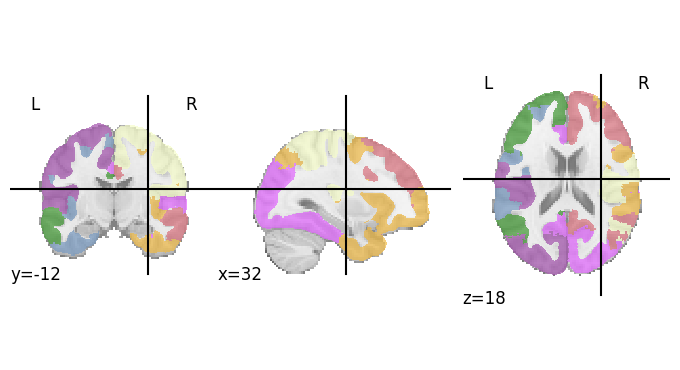

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

In [3]:
# labels

In [4]:
#%% Load the functional datasets (hc and sci, or sci_c and sci_t) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY

# Analysis Grouping		

# PreFES PreNFES MidFES MidNFES PostFES PostNFES

# PreFES	vs	MidFES
# MidFES	vs	PostFES
# PreFES	vs	PostFES
		
# PreNFES	vs	MidNFES
# MidNFES	vs	PostNFES
# PreNFES	vs	PostNFES
		
# PreFES	vs	PreNFES
# MidFES	vs	MidNFES
# PostFES	vs	PostNFES

# Initial Exp
# PreFES	vs	PreNFES 
# PreFES	vs	PostFES

if analysis == "ALL":
    group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
    group_label = ['Pre FES', 'Pre Non-FES', 'Post NFES']
#     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

elif analysis == "Group":
    group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


### Load data from Group 1

In [5]:
#=============================================================================
ts_g1, ts_g2, ts_g3, ts_g4, ts_g5, ts_g6 = [], [], [], [], [], []

nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements
nii_g3 = sorted(os.listdir(data_path+'/'+ group[2]))
nii_g3 = [x for x in nii_g3 if x.startswith('errts')] # remove not-nifti elements
nii_g4 = sorted(os.listdir(data_path+'/'+ group[3]))
nii_g4 = [x for x in nii_g4 if x.startswith('errts')] # remove not-nifti elements
nii_g5 = sorted(os.listdir(data_path+'/'+ group[4]))
nii_g5 = [x for x in nii_g5 if x.startswith('errts')] # remove not-nifti elements
nii_g6 = sorted(os.listdir(data_path+'/'+ group[5]))
nii_g6 = [x for x in nii_g6 if x.startswith('errts')] # remove not-nifti elements


# reading the nifti files
for nii in nii_g1: # 1st session PreFES
    ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_FES dataset: '+'{}\n'.format(nii))
for nii in nii_g2: # 1st session Pre_NFES
    ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_NFES dataset:'+'{}\n'.format(nii))
for nii in nii_g3: # 2nd session Mid_FES
    ts_g3.append(masker.fit_transform(data_path + '/'+ group[2] + '/'+ nii)) # ts_g3 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g4: # 2nd session Mid_FES
    ts_g4.append(masker.fit_transform(data_path + '/'+ group[3] + '/'+ nii)) # ts_g4 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_NFES dataset: '+'{}\n'.format(nii))
for nii in nii_g5: # 3rd session Post_FES
    ts_g5.append(masker.fit_transform(data_path + '/'+ group[4] + '/'+ nii)) # ts_g5 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g6: # 3rd session Post_NFES
    ts_g6.append(masker.fit_transform(data_path + '/'+ group[5] + '/'+ nii)) # ts_g6 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_NFES dataset:'+'{}\n'.format(nii))
    
# saving numpy arrays (timeseries)
# /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0], ts_g1) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1], ts_g2)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2], ts_g3) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3], ts_g4) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4], ts_g5)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5], ts_g6)

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]2.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cac

[Memory]22.0s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_NFES dataset:errts.scifes14a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]23.0s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_FES dataset:errts.scifes03b.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]23.9s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_FES dataset:errts.scifes03b.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_da

[Memory]43.6s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_FES dataset:errts.scifes04c.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]44.5s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_FES dataset:errts.scifes04c.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]45.4s, 0.8min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_FES dataset:errts.scifes07c.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_

[Memory]65.2s, 1.1min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes14c.r02.fanaticor+tlrc.nii.gz



/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

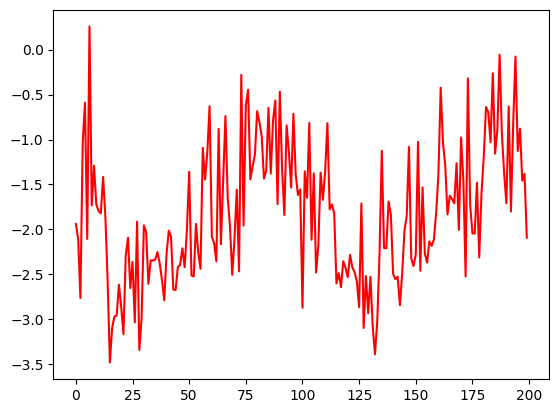

In [6]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1] + '.npy', allow_pickle=True))
ts_g3 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2] + '.npy', allow_pickle=True))
ts_g4 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3] + '.npy', allow_pickle=True))
ts_g5 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4] + '.npy', allow_pickle=True))
ts_g6 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
corr_g3 = corr_measure.fit_transform(ts_g3)
corr_g4 = corr_measure.fit_transform(ts_g4)
corr_g5 = corr_measure.fit_transform(ts_g5)
corr_g6 = corr_measure.fit_transform(ts_g6)
# Save arrays into a MATLAB-style .mat file for modularity
thld = 0.3
# bin_g1 = utils.binarize(utils.threshold_proportional(corr_g1, thld, copy=True))
# bin_g2 = utils.binarize(utils.threshold_proportional(corr_g2, thld, copy=True))
# bin_g3 = utils.binarize(utils.threshold_proportional(corr_g3, thld, copy=True))
# bin_g4 = utils.binarize(utils.threshold_proportional(corr_g4, thld, copy=True))
# bin_g5 = utils.binarize(utils.threshold_proportional(corr_g5, thld, copy=True))
# bin_g6 = utils.binarize(utils.threshold_proportional(corr_g6, thld, copy=True))

corr_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})
savemat(corr_path + 'corr_'+group[2]+'.mat', {'corr_'+group[2]: corr_g3})
savemat(corr_path + 'corr_'+group[3]+'.mat', {'corr_'+group[3]: corr_g4})
savemat(corr_path + 'corr_'+group[4]+'.mat', {'corr_'+group[4]: corr_g5})
savemat(corr_path + 'corr_'+group[5]+'.mat', {'corr_'+group[5]: corr_g6})

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices



# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
corr_g3_mean = np.mean(corr_g3, axis=0)
corr_g4_mean = np.mean(corr_g4, axis=0)
corr_g5_mean = np.mean(corr_g5, axis=0)
corr_g6_mean = np.mean(corr_g6, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))
bin_g3_mean = utils.binarize(utils.threshold_proportional(corr_g3_mean, thld, copy=True))
bin_g4_mean = utils.binarize(utils.threshold_proportional(corr_g4_mean, thld, copy=True))
bin_g5_mean = utils.binarize(utils.threshold_proportional(corr_g5_mean, thld, copy=True))
bin_g6_mean = utils.binarize(utils.threshold_proportional(corr_g6_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

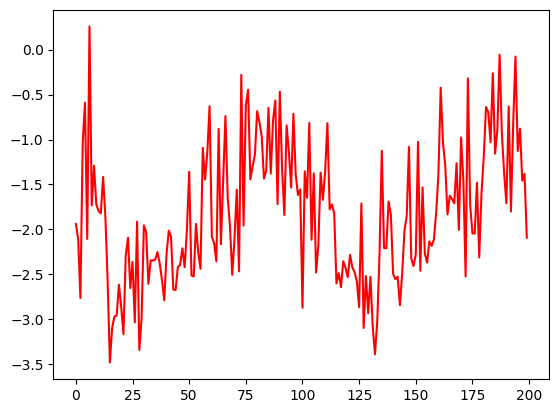

In [7]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1] + '.npy', allow_pickle=True))
ts_g3 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2] + '.npy', allow_pickle=True))
ts_g4 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3] + '.npy', allow_pickle=True))
ts_g5 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4] + '.npy', allow_pickle=True))
ts_g6 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
corr_g3 = corr_measure.fit_transform(ts_g3)
corr_g4 = corr_measure.fit_transform(ts_g4)
corr_g5 = corr_measure.fit_transform(ts_g5)
corr_g6 = corr_measure.fit_transform(ts_g6)
# Save arrays into a MATLAB-style .mat file for modularity

corr_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})
savemat(corr_path + 'corr_'+group[2]+'.mat', {'corr_'+group[2]: corr_g3})
savemat(corr_path + 'corr_'+group[3]+'.mat', {'corr_'+group[3]: corr_g4})
savemat(corr_path + 'corr_'+group[4]+'.mat', {'corr_'+group[4]: corr_g5})
savemat(corr_path + 'corr_'+group[5]+'.mat', {'corr_'+group[5]: corr_g6})

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices

thld = 0.3

# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
corr_g3_mean = np.mean(corr_g3, axis=0)
corr_g4_mean = np.mean(corr_g4, axis=0)
corr_g5_mean = np.mean(corr_g5, axis=0)
corr_g6_mean = np.mean(corr_g6, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))
bin_g3_mean = utils.binarize(utils.threshold_proportional(corr_g3_mean, thld, copy=True))
bin_g4_mean = utils.binarize(utils.threshold_proportional(corr_g4_mean, thld, copy=True))
bin_g5_mean = utils.binarize(utils.threshold_proportional(corr_g5_mean, thld, copy=True))
bin_g6_mean = utils.binarize(utils.threshold_proportional(corr_g6_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [8]:
print(f'{analysis} has ==> {len(ts_g1)}-{group[0]} & {len(ts_g2)}-{group[1]} & {len(ts_g3)}-{group[2]} & {len(ts_g4)}-{group[3]} & {len(ts_g5)}-{group[4]} & {len(ts_g6)}-{group[5]}')

ALL has ==> 14-pre_fes & 10-pre_nfes & 10-mid_fes & 10-mid_nfes & 16-post_fes & 10-post_nfes


In [9]:
# PreFES PreNFES PostFES id 0|1; 1|2; 4|5
# 3 6 7 5 7 4
# 3	PreFES	vs	PostFES
# 7	PreFES	vs	PreNFES

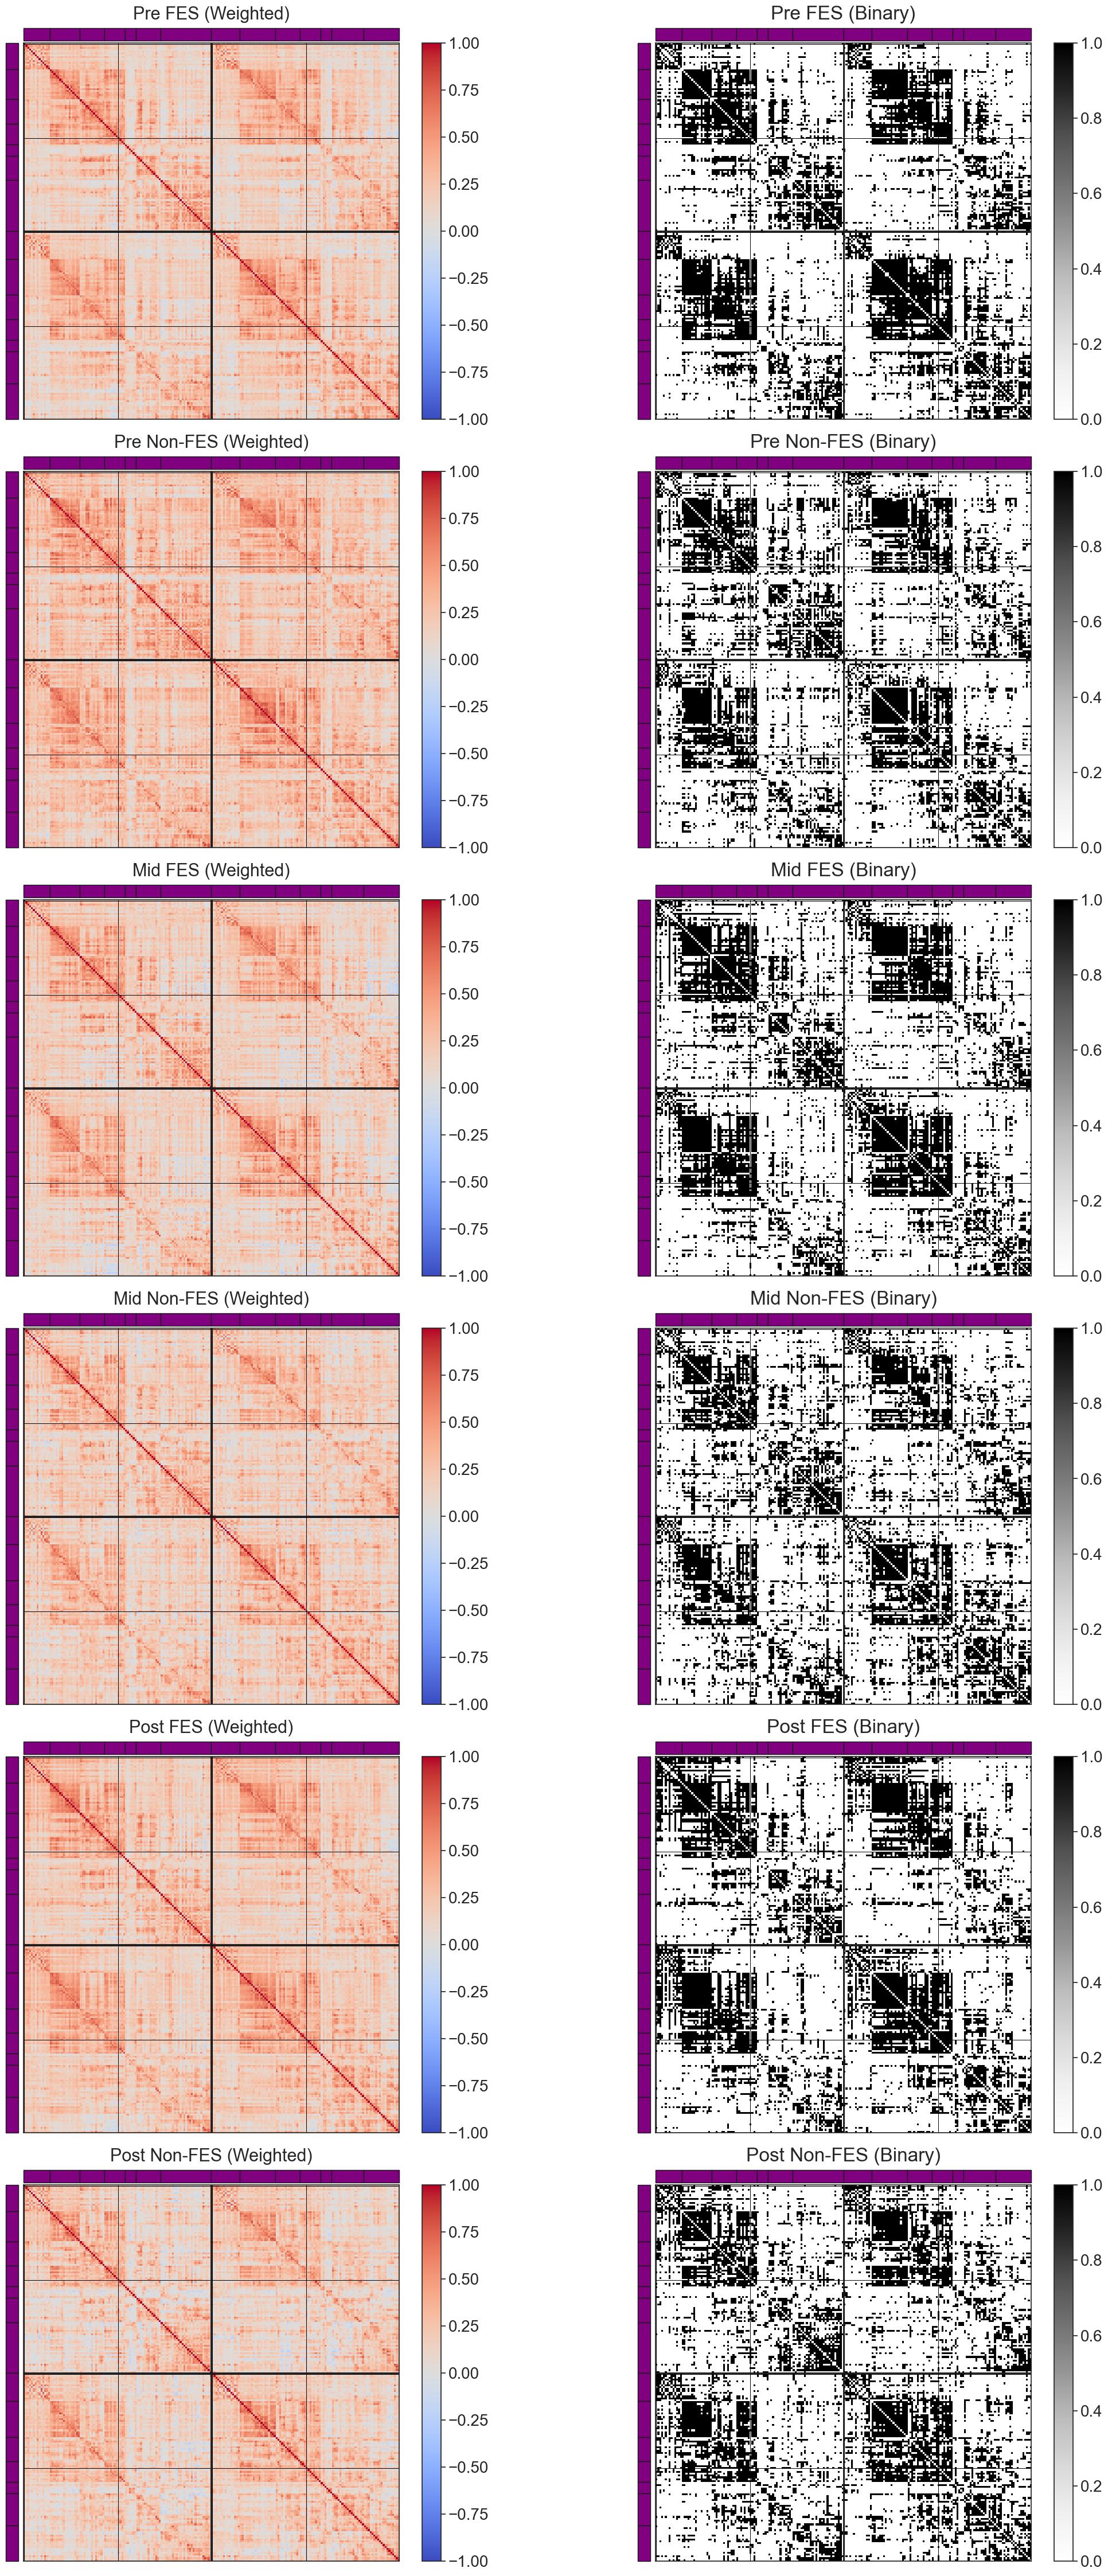

In [119]:
import matplotlib.patches as patches

# Define the number of rows and columns
nrows = 6
ncols = 2

# Create a 2-column by 6-row subplot figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))

# Assuming these are predefined matrices
data_matrices_weighted = [corr_g1_mean, corr_g2_mean, corr_g3_mean, corr_g4_mean, corr_g5_mean, corr_g6_mean]
data_matrices_binarized = [bin_g1_mean, bin_g2_mean, bin_g3_mean, bin_g4_mean, bin_g5_mean, bin_g6_mean]
group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']
# Loop over the rows and columns
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        
        if j == 0:  # Left column, weighted correlations
            ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='coolwarm') # twilight_shifted
            ax.set_title(f'{group_label[i]} (Weighted)', fontsize=22, y=1.04)

            # Customize ticks for weighted matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='coolwarm'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        else:  # Right column, binarized correlations
            ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys')
            ax.set_title(f'{group_label[i]} (Binary)', fontsize=24, y=1.04)

            # Customize ticks for binarized matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        # Draw grid lines
        ax.axvline(x=100-0.5, color='k', linewidth=2)
        ax.axhline(y=100-0.5, color='k', linewidth=2)
        ax.grid(color='black', linestyle='-', linewidth=0.7)

        # Disable ticks and labels
        ax.tick_params(
            axis='both',       # changes apply to the x,y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False)  # ticks and labels along the edge are off

        # Add rectangle objects as tick labels (X axis)
        xmin, xmax, ymin, ymax = ax.axis()
        xy = split[:-1]  # anchor points
        h = (ymax - ymin) / 30
        space = h / 5
        intercept = ymax + space  # intercept
        w = split[1:] - xy  # rectangle width(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((xy[k], intercept), width=w[k], height=h, facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

        # Add rectangle objects as tick labels (Y axis)
        width = (ymax - ymin) / 30
        h = split[1:] - xy  # rectangle height(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((intercept + space, xy[k]), width=width, height=h[k], facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the entire figure with subplots
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_weighted_bin.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_corr_bin.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# Show the plot
plt.show()


In [11]:
# import matplotlib.patches as patches

# # Define the number of rows and columns
# nrows = 6
# ncols = 2

# # Create a 2-column by 6-row subplot figure
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))

# # Assuming these are predefined matrices
# data_matrices_weighted = [corr_g1_mean, corr_g2_mean, corr_g3_mean, corr_g4_mean, corr_g5_mean, corr_g6_mean]
# data_matrices_binarized = [bin_g1_mean, bin_g2_mean, bin_g3_mean, bin_g4_mean, bin_g5_mean, bin_g6_mean]
# group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']
# # Loop over the rows and columns
# for i in range(nrows):
#     for j in range(ncols):
#         ax = axes[i, j]
        
#         if j == 0:  # Left column, weighted correlations
#             ax.matshow(corr_g1[i][0], vmin=-1, vmax=1, cmap='twilight_shifted')
#             ax.set_title(f'{group_label[i]} (Weighted)', fontsize=22, y=1.04)

#             # Customize ticks for weighted matrix
#             ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
#             ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

#             # Add colorbar
#             cb = plt.colorbar(ax.matshow(corr_g1[i][0], vmin=-1, vmax=1, cmap='twilight_shifted'), ax=ax, fraction=0.03, pad=0.03)
#             cb.ax.tick_params(labelsize=20)

#         else:  # Right column, binarized correlations
#             ax.matshow(bin_g1[i][0], vmin=0, vmax=1, cmap='Greys')
#             ax.set_title(f'{group_label[i]} (Binary)', fontsize=24, y=1.04)

#             # Customize ticks for binarized matrix
#             ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
#             ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

#             # Add colorbar
#             cb = plt.colorbar(ax.matshow(bin_g1_mean[i][0], vmin=0, vmax=1, cmap='Greys'), ax=ax, fraction=0.03, pad=0.03)
#             cb.ax.tick_params(labelsize=20)

#         # Draw grid lines
#         ax.axvline(x=100-0.5, color='k', linewidth=2)
#         ax.axhline(y=100-0.5, color='k', linewidth=2)
#         ax.grid(color='black', linestyle='-', linewidth=0.7)

#         # Disable ticks and labels
#         ax.tick_params(
#             axis='both',       # changes apply to the x,y-axis
#             which='both',      # both major and minor ticks are affected
#             bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False)  # ticks and labels along the edge are off

#         # Add rectangle objects as tick labels (X axis)
#         xmin, xmax, ymin, ymax = ax.axis()
#         xy = split[:-1]  # anchor points
#         h = (ymax - ymin) / 30
#         space = h / 5
#         intercept = ymax + space  # intercept
#         w = split[1:] - xy  # rectangle width(s)
#         for k in range(len(xy)):  # plot rectangles one-by-one
#             ax.add_patch(patches.Rectangle((xy[k], intercept), width=w[k], height=h, facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

#         # Add rectangle objects as tick labels (Y axis)
#         width = (ymax - ymin) / 30
#         h = split[1:] - xy  # rectangle height(s)
#         for k in range(len(xy)):  # plot rectangles one-by-one
#             ax.add_patch(patches.Rectangle((intercept + space, xy[k]), width=width, height=h[k], facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

# # Adjust layout to avoid overlap
# plt.tight_layout()

# # Save the entire figure with subplots
# plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_weighted_bins.png',
#             bbox_inches='tight', pad_inches=0, format='png', dpi=300)
# plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_corr_bins.pdf',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# # Show the plot
# plt.show()


In [12]:
#### define global measures Group 1
n_g1 = np.shape(corr_g1)[0] # number of Group 1 subjects
lam_g1 = np.zeros((n_g1,10)) # lambda (characteristic path length)
glb_g1 = np.zeros((n_g1,10)) # global efficieny
clc_g1 = np.zeros((n_g1,10)) # global clustering coefficients
tra_g1 = np.zeros((n_g1,10)) # Transitivity
ass_g1 = np.zeros((n_g1,10)) # assortativity
mod_g1 = np.zeros((n_g1,10)) # modularity

for i in range(10):
    thld = np.float32((i+1)*0.05)    
    # matrix binarization
    bin_g1 = np.zeros(np.shape(corr_g1))
    for k in range(n_g1):
        bin_g1[k] = utils.binarize(utils.threshold_proportional(corr_g1[k], thld, copy=True))   
    # compute global measures HC
    for k in range(n_g1):                
        dis = distance.distance_bin(bin_g1[k]) # TIME CONSUMING  
        lam_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
        glb_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
        clc_g1[k,i] = np.mean(clustering.clustering_coef_bu(bin_g1[k]))
        tra_g1[k,i] = np.mean(clustering.transitivity_bu(bin_g1[k]))
        ass_g1[k,i] = core.assortativity_bin(bin_g1[k], flag=0) # 0: undirected graph
        mod_g1[k,i] = modularity.modularity_louvain_und(bin_g1[k], gamma=1.0, hierarchy=False, seed=None)[1]     
    print(thld)
    
# # define global measures Group 2
# n_g2 = np.shape(corr_g2)[0] # number of Group 2 subjects

# lam_g2 = np.zeros((n_g2,10)) # lambda (characteristic path length)
# glb_g2 = np.zeros((n_g2,10)) # global efficieny
# clc_g2 = np.zeros((n_g2,10)) # global clustering coefficients
# tra_g2 = np.zeros((n_g2,10)) # Transitivity
# ass_g2 = np.zeros((n_g2,10)) # assortativity
# mod_g2 = np.zeros((n_g2,10)) # modularity

# for i in range(10):
#     thld = np.float32((i+1)*0.05)
#     # matrix binarization
#     bin_g2 = np.zeros(np.shape(corr_g2))
#     for k in range(n_g2):
#         bin_g2[k] = utils.binarize(utils.threshold_proportional(corr_g2[k], thld, copy=True))
#     # compute global measures SCI
#     for k in range(n_g2):                
#         dis = distance.distance_bin(bin_g2[k]) # TIME CONSUMING  
#         lam_g2[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
#         glb_g2[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
#         clc_g2[k,i] = np.mean(clustering.clustering_coef_bu(bin_g2[k]))
#         tra_g2[k,i] = np.mean(clustering.transitivity_bu(bin_g2[k]))
#         ass_g2[k,i] = core.assortativity_bin(bin_g2[k], flag=0) # 0: undirected graph
#         mod_g2[k,i] = modularity.modularity_louvain_und(bin_g2[k], gamma=1.0, hierarchy=False, seed=None)[1] 
#     print(thld)
    
# define global measures Group 3 postfes
n_g3 = np.shape(corr_g5)[0] # number of Group 2 subjects

lam_g3 = np.zeros((n_g3,10)) # lambda (characteristic path length)
glb_g3 = np.zeros((n_g3,10)) # global efficieny
clc_g3 = np.zeros((n_g3,10)) # global clustering coefficients
tra_g3 = np.zeros((n_g3,10)) # Transitivity
ass_g3 = np.zeros((n_g3,10)) # assortativity
mod_g3 = np.zeros((n_g3,10)) # modularity

for i in range(10):
    thld = np.float32((i+1)*0.05)
    # matrix binarization
    bin_g3 = np.zeros(np.shape(corr_g5))
    for k in range(n_g3):
        bin_g3[k] = utils.binarize(utils.threshold_proportional(corr_g5[k], thld, copy=True))
    # compute global measures SCI
    for k in range(n_g3):                
        dis = distance.distance_bin(bin_g3[k]) # TIME CONSUMING  
        lam_g3[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
        glb_g3[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
        clc_g3[k,i] = np.mean(clustering.clustering_coef_bu(bin_g3[k]))
        tra_g3[k,i] = np.mean(clustering.transitivity_bu(bin_g3[k]))
        ass_g3[k,i] = core.assortativity_bin(bin_g3[k], flag=0) # 0: undirected graph
        mod_g3[k,i] = modularity.modularity_louvain_und(bin_g3[k], gamma=1.0, hierarchy=False, seed=None)[1] 
    print(thld)

# # define global measures Group 4
# n_g4 = np.shape(corr_g4)[0] # number of Group 2 subjects

# lam_g4 = np.zeros((n_g4,10)) # lambda (characteristic path length)
# glb_g4 = np.zeros((n_g4,10)) # global efficieny
# clc_g4 = np.zeros((n_g4,10)) # global clustering coefficients
# tra_g4 = np.zeros((n_g4,10)) # Transitivity
# ass_g4 = np.zeros((n_g4,10)) # assortativity
# mod_g4 = np.zeros((n_g4,10)) # modularity

# for i in range(10):
#     thld = np.float32((i+1)*0.05)
#     # matrix binarization
#     bin_g4 = np.zeros(np.shape(corr_g4))
#     for k in range(n_g3):
#         bin_g4[k] = utils.binarize(utils.threshold_proportional(corr_g4[k], thld, copy=True))
#     # compute global measures SCI
#     for k in range(n_g4):                
#         dis = distance.distance_bin(bin_g4[k]) # TIME CONSUMING  
#         lam_g4[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
#         glb_g4[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
#         clc_g4[k,i] = np.mean(clustering.clustering_coef_bu(bin_g4[k]))
#         tra_g4[k,i] = np.mean(clustering.transitivity_bu(bin_g4[k]))
#         ass_g4[k,i] = core.assortativity_bin(bin_g4[k], flag=0) # 0: undirected graph
#         mod_g4[k,i] = modularity.modularity_louvain_und(bin_g4[k], gamma=1.0, hierarchy=False, seed=None)[1] 
#     print(thld)
    
# # define global measures Group 5
# n_g5 = np.shape(corr_g5)[0] # number of Group 2 subjects

# lam_g5 = np.zeros((n_g5,10)) # lambda (characteristic path length)
# glb_g5 = np.zeros((n_g5,10)) # global efficieny
# clc_g5 = np.zeros((n_g5,10)) # global clustering coefficients
# tra_g5 = np.zeros((n_g5,10)) # Transitivity
# ass_g5 = np.zeros((n_g5,10)) # assortativity
# mod_g5 = np.zeros((n_g5,10)) # modularity

# for i in range(10):
#     thld = np.float32((i+1)*0.05)
#     # matrix binarization
#     bin_g5 = np.zeros(np.shape(corr_g5))
#     for k in range(n_g5):
#         bin_g5[k] = utils.binarize(utils.threshold_proportional(corr_g5[k], thld, copy=True))
#     # compute global measures SCI
#     for k in range(n_g5):                
#         dis = distance.distance_bin(bin_g5[k]) # TIME CONSUMING  
#         lam_g5[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
#         glb_g5[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
#         clc_g5[k,i] = np.mean(clustering.clustering_coef_bu(bin_g5[k]))
#         tra_g5[k,i] = np.mean(clustering.transitivity_bu(bin_g5[k]))
#         ass_g5[k,i] = core.assortativity_bin(bin_g5[k], flag=0) # 0: undirected graph
#         mod_g5[k,i] = modularity.modularity_louvain_und(bin_g5[k], gamma=1.0, hierarchy=False, seed=None)[1] 
#     print(thld)
    
# # define global measures Group 6
# n_g6 = np.shape(corr_g6)[0] # number of Group 2 subjects

# lam_g6 = np.zeros((n_g6,10)) # lambda (characteristic path length)
# glb_g6 = np.zeros((n_g6,10)) # global efficieny
# clc_g6 = np.zeros((n_g6,10)) # global clustering coefficients
# tra_g6 = np.zeros((n_g6,10)) # Transitivity
# ass_g6 = np.zeros((n_g6,10)) # assortativity
# mod_g6 = np.zeros((n_g6,10)) # modularity

# for i in range(10):
#     thld = np.float32((i+1)*0.05)
#     # matrix binarization
#     bin_g3 = np.zeros(np.shape(corr_g6))
#     for k in range(n_g6):
#         bin_g6[k] = utils.binarize(utils.threshold_proportional(corr_g6[k], thld, copy=True))
#     # compute global measures SCI
#     for k in range(n_g6):                
#         dis = distance.distance_bin(bin_g6[k]) # TIME CONSUMING  
#         lam_g6[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
#         glb_g6[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
#         clc_g6[k,i] = np.mean(clustering.clustering_coef_bu(bin_g6[k]))
#         tra_g6[k,i] = np.mean(clustering.transitivity_bu(bin_g6[k]))
#         ass_g6[k,i] = core.assortativity_bin(bin_g6[k], flag=0) # 0: undirected graph
#         mod_g6[k,i] = modularity.modularity_louvain_und(bin_g6[k], gamma=1.0, hierarchy=False, seed=None)[1] 
#     print(thld)

0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5


In [11]:
# print(f'MinMax weighted: {np.min(corr_g1_mean), np.min(corr_g2_mean), np.max(corr_g1_mean), np.max(corr_g2_mean)}\nMinMax Binary: {np.min(bin_g1_mean), np.min(bin_g2_mean), np.max(bin_g1_mean), np.max(bin_g2_mean)} ')
# # corr_g1_mean bin_g1_mean

In [11]:

# # Permutation test
# def perm_test(xs, ys, nmc):
#     n, k = len(xs), 0
#     diff = np.abs(np.mean(xs) - np.mean(ys))
#     zs = np.concatenate([xs, ys])
#     for j in range(nmc):
#         np.random.shuffle(zs)
#         k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
#     return k / nmc

# # Define/compute local measures  
# thld = 0.3

# # Group sizes (n_g1, n_g2, n_g3, n_g4, n_g5, n_g6 should be defined)
# n_groups = 6
# group_sizes = [n_g1, n_g2, n_g3, n_g4, n_g5, n_g6]

# # Initialize arrays for each group
# deg_l = [np.zeros((n, 200)) for n in group_sizes]
# eig_l = [np.zeros((n, 200)) for n in group_sizes]
# clc_l = [np.zeros((n, 200)) for n in group_sizes]
# eff_l = [np.zeros((n, 200)) for n in group_sizes]
# kco_l = [np.zeros((n, 200)) for n in group_sizes]

# # Initialize binary matrices for each group
# bin_groups = [np.zeros(np.shape(corr)) for corr in [corr_g1, corr_g2, corr_g3, corr_g4, corr_g5, corr_g6]]

# # Compute local measures for each group
# for g in range(n_groups):
#     for k in range(group_sizes[g]): 
#         bin_groups[g][k] = utils.binarize(utils.threshold_proportional(corr_g[g][k], thld, copy=True))
        
#         deg_l[g][k, :] = degree.degrees_und(bin_groups[g][k])
#         eig_l[g][k, :] = centrality.eigenvector_centrality_und(bin_groups[g][k])
#         clc_l[g][k, :] = clustering.clustering_coef_bu(bin_groups[g][k])
#         eff_l[g][k, :] = distance.efficiency_bin(bin_groups[g][k], local=True)
#         kco_l[g][k, :] = centrality.kcoreness_centrality_bu(bin_groups[g][k])[0]
#         print(f'Group {g + 1}', k) 

# # %% BOXPLOT: Display every observation over the boxplot

# color = ['#65AEE5', '#F39220', '#F004BB', '#4CAF50', '#FF9800', '#9C27B0']  # Extended color palette

# # Assuming 'lam', 'clc', 'ass', 'mod' datasets are defined for each group
# datasets = {
#     'A': [lam_g1, lam_g2, lam_g3, lam_g4, lam_g5, lam_g6],
#     'B': [clc_g1, clc_g2, clc_g3, clc_g4, clc_g5, clc_g6],
#     'C': [ass_g1, ass_g2, ass_g3, ass_g4, ass_g5, ass_g6],
#     'D': [mod_g1, mod_g2, mod_g3, mod_g4, mod_g5, mod_g6],
# }

# ticks = ['10%', '20%', '30%', '40%', '50%']
# names = []

# # Prepare datasets and x-values for plotting
# vals = {key: [] for key in datasets}
# xs = {key: [] for key in datasets}

# for key, data_list in datasets.items():
#     for i, df in enumerate(data_list):
#         df_data = df[:, 1:10:2]  # Selecting columns as per original code
#         vals[key].append(df_data)
#         names.append(df.columns.tolist()[1:10:2])
#         for j, col in enumerate(df.columns[1:10:2]):
#             xs[key].append(np.random.normal(i * 3 + (0.5 if i % 2 else -0.5), 0.08, df_data.shape[0]))

# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5), sharey=False)

# # Plotting for each dataset
# for idx, (key, ax) in enumerate(zip(datasets.keys(), axes)):
#     for i in range(n_groups):
#         ax.boxplot(vals[key][i], positions=np.array(range(len(vals[key][i][0])))*3 + (i - 0.5), widths=0.7, patch_artist=True,
#                    boxprops=dict(facecolor=color[i], color=color[i]),
#                    medianprops=dict(color='k'))
#         # Add jittered scatter points
#         ax.scatter(xs[key][i], vals[key][i].flatten(), color=color[i], alpha=0.75, s=25, linewidth=0.5, edgecolors='k')

#     ax.set_xticks(range(0, len(ticks) * 3, 3))
#     ax.set_xticklabels(ticks)
#     ax.set_ylabel(f"{key} Value", fontweight='normal', fontsize=12)
#     ax.set_xlabel("Density", fontweight='normal', fontsize=12)

# plt.tight_layout()
# plt.show()


In [12]:
# # permutation test
# def perm_test(xs, ys, nmc):
#     n, k = len(xs), 0
#     diff = np.abs(np.mean(xs) - np.mean(ys))
#     zs = np.concatenate([xs, ys])
#     for j in range(nmc):
#         np.random.shuffle(zs)
#         k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
#     return k / nmc
    
# # %% define/compute local measures  
# thld = 0.3

# # Group 1
# deg_l_g1 = np.zeros((n_g1,200))
# eig_l_g1 = np.zeros((n_g1,200))
# clc_l_g1 = np.zeros((n_g1,200))
# eff_l_g1 = np.zeros((n_g1,200))
# kco_l_g1 = np.zeros((n_g1,200))   

# bin_g1 = np.zeros(np.shape(corr_g1))   
  
# for k in range(n_g1): 
    
#     bin_g1[k] = utils.binarize(utils.threshold_proportional(corr_g1[k], thld, copy=True))
    
#     deg_l_g1[k,:] = degree.degrees_und(bin_g1[k])
#     eig_l_g1[k,:] = centrality.eigenvector_centrality_und(bin_g1[k])
#     clc_l_g1[k,:] = clustering.clustering_coef_bu(bin_g1[k])
#     eff_l_g1[k,:] = distance.efficiency_bin(bin_g1[k], local=True) # [Time consuming]^n: 
#     kco_l_g1[k,:] = centrality.kcoreness_centrality_bu(bin_g1[k])[0]
#     print('Group 1', k)  
    

# # Group 2
# deg_l_g2 = np.zeros((n_g2,200))
# eig_l_g2 = np.zeros((n_g2,200))
# clc_l_g2 = np.zeros((n_g2,200))
# eff_l_g2 = np.zeros((n_g2,200))
# kco_l_g2 = np.zeros((n_g2,200))   

# bin_g2 = np.zeros(np.shape(corr_g2))   
  
# for k in range(n_g2): 
    
#     bin_g2[k] = utils.binarize(utils.threshold_proportional(corr_g2[k], thld, copy=True))
    
#     deg_l_g2[k,:] = degree.degrees_und(bin_g2[k])
#     eig_l_g2[k,:] = centrality.eigenvector_centrality_und(bin_g2[k])
#     clc_l_g2[k,:] = clustering.clustering_coef_bu(bin_g2[k])
#     eff_l_g2[k,:] = distance.efficiency_bin(bin_g2[k], local=True) # [Time consuming]^n: 
#     kco_l_g2[k,:] = centrality.kcoreness_centrality_bu(bin_g2[k])[0]
#     print('Group 2', k)

# # Group 3
# deg_l_g3 = np.zeros((n_g3,200))
# eig_l_g3 = np.zeros((n_g3,200))
# clc_l_g3 = np.zeros((n_g3,200))
# eff_l_g3 = np.zeros((n_g3,200))
# kco_l_g3 = np.zeros((n_g3,200))   

# bin_g3 = np.zeros(np.shape(corr_g3))   
  
# for k in range(n_g3): 
    
#     bin_g3[k] = utils.binarize(utils.threshold_proportional(corr_g3[k], thld, copy=True))
    
#     deg_l_g3[k,:] = degree.degrees_und(bin_g3[k])
#     eig_l_g3[k,:] = centrality.eigenvector_centrality_und(bin_g3[k])
#     clc_l_g3[k,:] = clustering.clustering_coef_bu(bin_g3[k])
#     eff_l_g3[k,:] = distance.efficiency_bin(bin_g3[k], local=True) # [Time consuming]^n: 
#     kco_l_g3[k,:] = centrality.kcoreness_centrality_bu(bin_g3[k])[0]
#     print('Group 3', k)

# #%% BOXPLOT: Display every observations over the boxplot
# # Note that violin plots can be an alternative if you have many many observations. 
# # Another way to plot boxplot is via: seaborn -> https://seaborn.pydata.org/generated/seaborn.boxplot.html  or https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/     
 
# color = ['#65AEE5', '#F39220', '#F004BB']

# datasetA1 = lam_g1[:,1:10:2]
# datasetA2 = lam_g2[:,1:10:2]
# datasetA3 = lam_g3[:,1:10:2]

# datasetB1 = clc_g1[:,1:10:2]
# datasetB2 = clc_g2[:,1:10:2]
# datasetB3 = clc_g3[:,1:10:2]

# datasetC1 = ass_g1[:,1:10:2]
# datasetC2 = ass_g2[:,1:10:2]
# datasetC3 = ass_g3[:,1:10:2]

# datasetD1 = mod_g1[:,1:10:2]
# datasetD2 = mod_g2[:,1:10:2]
# datasetD3 = mod_g3[:,1:10:2]

# ticks = ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%']
# ticks = ['10%', '20%', '30%', '40%', '50%']

# dfA1 = pd.DataFrame(datasetA1, columns=ticks)
# dfA2 = pd.DataFrame(datasetA2, columns=ticks)
# dfA3 = pd.DataFrame(datasetA3, columns=ticks)

# dfB1 = pd.DataFrame(datasetB1, columns=ticks)
# dfB2 = pd.DataFrame(datasetB2, columns=ticks)
# dfB3 = pd.DataFrame(datasetB3, columns=ticks)

# dfC1 = pd.DataFrame(datasetC1, columns=ticks)
# dfC2 = pd.DataFrame(datasetC2, columns=ticks)
# dfC3 = pd.DataFrame(datasetC3, columns=ticks)

# dfD1 = pd.DataFrame(datasetD1, columns=ticks)
# dfD2 = pd.DataFrame(datasetD2, columns=ticks)
# dfD3 = pd.DataFrame(datasetD3, columns=ticks)

# names = []
# valsA1, xsA1, valsA2, xsA2, valsA3, xsA3 = [],[], [],[], [],[]
# valsB1, xsB1, valsB2, xsB2, valsB3, xsB3 = [],[], [],[], [],[]
# valsC1, xsC1, valsC2, xsC2, valsC3, xsC3 = [],[], [],[], [],[]
# valsD1, xsD1, valsD2, xsD2, valsD3, xsD3 = [],[], [],[], [],[]

# for i, col in enumerate(dfA1.columns):
#     valsA1.append(dfA1[col].values)
#     valsA2.append(dfA2[col].values)
#     valsA3.append(dfA3[col].values)
#     valsB1.append(dfB1[col].values)
#     valsB2.append(dfB2[col].values)
#     valsB3.append(dfB3[col].values)
#     valsC1.append(dfC1[col].values)
#     valsC2.append(dfC2[col].values)
#     valsC3.append(dfC3[col].values)
#     valsD1.append(dfD1[col].values)
#     valsD2.append(dfD2[col].values)
#     valsD3.append(dfD3[col].values)
#     names.append(col)
#     # Add some random "jitter" to the data points
#     xsA1.append(np.random.normal(i*3-0.5, 0.08, dfA1[col].values.shape[0]))
#     xsA2.append(np.random.normal(i*3+0.5, 0.08, dfA2[col].values.shape[0]))
#     xsA3.append(np.random.normal(i*3+0.5, 0.08, dfA3[col].values.shape[0]))
#     xsB1.append(np.random.normal(i*3-0.5, 0.08, dfB1[col].values.shape[0]))
#     xsB2.append(np.random.normal(i*3+0.5, 0.08, dfB2[col].values.shape[0]))
#     xsB3.append(np.random.normal(i*3+0.5, 0.08, dfB3[col].values.shape[0]))
#     xsC1.append(np.random.normal(i*3-0.5, 0.08, dfC1[col].values.shape[0]))
#     xsC2.append(np.random.normal(i*3+0.5, 0.08, dfC2[col].values.shape[0]))
#     xsC3.append(np.random.normal(i*3+0.5, 0.08, dfC3[col].values.shape[0]))
#     xsD1.append(np.random.normal(i*3-0.5, 0.08, dfD1[col].values.shape[0]))
#     xsD2.append(np.random.normal(i*3+0.5, 0.08, dfD2[col].values.shape[0]))
#     xsD3.append(np.random.normal(i*3+0.5, 0.08, dfD3[col].values.shape[0]))

# fig, (ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize=(14, 4.5))

# #bpA1 = ax1.boxplot(valsA1, labels=names, positions=np.array(range(len(datasetA1[0])))*3-0.5, sym='', widths=0.7)
# #bpA2 = ax1.boxplot(valsA2, labels=names, positions=np.array(range(len(datasetA2[0])))*3+0.5, sym='', widths=0.7)
# bpB1 = ax2.boxplot(valsB1, labels=names, positions=np.array(range(len(datasetB1[0])))*3-0.5, sym='', widths=0.7)
# bpB2 = ax2.boxplot(valsB2, labels=names, positions=np.array(range(len(datasetB2[0])))*3+0.5, sym='', widths=0.7)
# bpB3 = ax2.boxplot(valsB3, labels=names, positions=np.array(range(len(datasetB3[0])))*3+0.5, sym='', widths=0.7)
# bpC1 = ax3.boxplot(valsC1, labels=names, positions=np.array(range(len(datasetC1[0])))*3-0.5, sym='', widths=0.7)
# bpC2 = ax3.boxplot(valsC2, labels=names, positions=np.array(range(len(datasetC2[0])))*3+0.5, sym='', widths=0.7)
# bpC3 = ax3.boxplot(valsC3, labels=names, positions=np.array(range(len(datasetC3[0])))*3+0.5, sym='', widths=0.7)
# bpD1 = ax4.boxplot(valsD1, labels=names, positions=np.array(range(len(datasetD1[0])))*3-0.5, sym='', widths=0.7)
# bpD2 = ax4.boxplot(valsD2, labels=names, positions=np.array(range(len(datasetD2[0])))*3+0.5, sym='', widths=0.7)
# bpD3 = ax4.boxplot(valsD3, labels=names, positions=np.array(range(len(datasetD3[0])))*3+0.5, sym='', widths=0.7)
# # Optional: change the color of 'boxes', 'whiskers', 'caps', 'medians', and 'fliers'
# #plt.setp(bpA1['medians'], color='#800020') # or color='#D7191C' ...
# #plt.setp(bpA2['medians'], linewidth=.7, linestyle='-', color='#800020')
# plt.setp(bpB1['medians'], color='#800020')
# plt.setp(bpB2['medians'], linewidth=.7, linestyle='-', color='#800020')
# plt.setp(bpB3['medians'], linewidth=.7, linestyle='-', color='#800020')
# plt.setp(bpC1['medians'], color='#800020')
# plt.setp(bpC2['medians'], linewidth=.7, linestyle='-', color='#800020')
# plt.setp(bpC3['medians'], linewidth=.7, linestyle='-', color='#800020')
# plt.setp(bpD1['medians'], color='#800020')
# plt.setp(bpD2['medians'], linewidth=.7, linestyle='-', color='#800020')
# plt.setp(bpD3['medians'], linewidth=.7, linestyle='-', color='#800020')

# palette = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'tan', 'orchid', 'cyan', 'gold', 'crimson']
# size = 25 # scatter point size
# # =============================================================================
# # for xA1, xA2, valA1, valA2, c in zip(xsA1, xsA2, valsA1, valsA2, palette):
# #     ax1.scatter(xA1, valA1, alpha=0.75, color=color[0], s=size, linewidth=0.2, edgecolors='k') # plt.plot(xA1, valA1, 'r.', alpha=0.4)
# #     ax1.scatter(xA2, valA2, alpha=0.75, color=color[1], s=size, linewidth=0.2, edgecolors='k')
# #     
# # =============================================================================
# for xB1, xB2, xB3, valB1, valB2, valB3, c in zip(xsB1, xsB2, xsB3, valsB1, valsB2, valsB3, palette):
#     ax2.scatter(xB1, valB1, alpha=0.75, color=color[0], s=size, linewidth=0.5, edgecolors='k')
#     ax2.scatter(xB2, valB2, alpha=0.75, color=color[1], s=size, linewidth=0.5, edgecolors='k') 
#     ax2.scatter(xB3, valB3, alpha=0.75, color=color[2], s=size, linewidth=0.5, edgecolors='k')
    
# for xC1, xC2, xC3, valC1, valC2, valC3, c in zip(xsC1, xsC2, xsC3, valsC1, valsC2, valsC3, palette):
#     ax3.scatter(xC1, valC1, alpha=0.75, color=color[0], s=size, linewidth=0.5, edgecolors='k')
#     ax3.scatter(xC2, valC2, alpha=0.75, color=color[1], s=size, linewidth=0.5, edgecolors='k') 
#     ax3.scatter(xC3, valC3, alpha=0.75, color=color[2], s=size, linewidth=0.5, edgecolors='k') 
    
# for xD1, xD2, xD3, valD1, valD2, valD3, c in zip(xsD1, xsD2, xsD3, valsD1, valsD2, valsD3, palette):
#     ax4.scatter(xD1, valD1, alpha=0.75, color=color[0], s=size, linewidth=0.5, edgecolors='k')
#     ax4.scatter(xD2, valD2, alpha=0.75, color=color[1], s=size, linewidth=0.5, edgecolors='k') 
#     ax4.scatter(xD3, valD3, alpha=0.75, color=color[2], s=size, linewidth=0.5, edgecolors='k')

# annot_xs1_list = [-0.5, 2.5, 5.5, 8.5, 11.5, 14.5, 17.5, 20.5, 23.5, 26.5]
# annot_xs2_list = [0.5, 3.5, 6.5, 9.5, 12.5, 15.5, 18.5, 21.5, 24.5, 27.5]
# annot_xs3_list = [1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 29.5]

# annot_xs1_list = [-0.5, 2.5, 5.5, 8.5, 11.5] 
# annot_xs2_list = [0.5, 3.5, 6.5, 9.5, 12.5] 
# annot_xs3_list = [1.5, 4.5, 7.5, 10.5, 13.5] 

# # Use the pyplot interface to customize any subplot...
# # =============================================================================
# # # First subplot
# # plt.sca(ax1)
# # plt.xticks(range(0, len(ticks) * 3, 3), ticks)
# # plt.xlim(-1.5, len(ticks)*3-1.5)
# # plt.ylabel("Path Length", fontweight='normal', fontsize=12)
# # plt.xlabel("Density", fontweight='normal', fontsize=12)
# # plt.plot([], c='y', label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
# # plt.plot([], c='b', label=group_label[1], marker='o', linestyle='None', markersize=8)
# # # Statistical annotation
# # xs1 = np.array([annot_xs1_list[index] for index in []])
# # xs2 = np.array([annot_xs2_list[index] for index in []])
# # for x1, x2 in zip(xs1, xs2):  # e.g., column 25%
# #     y, h, col = max(datasetA1[:,int((x1+x2)/6)].max(), datasetA2[:,int((x1+x2)/6)].max()) + 0.4, 0.12, 'k'
# #     plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# #     plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, size=14)      
# # # Create empty plot with blank marker containing the extra label
# # #plt.text(20.81, 5.18, "*", ha='center', va='bottom', color=col, size=14, zorder=10) 
# # #plt.plot([], [], " ", label='Significant Mean ($P\leq 0.05$)', color='black')    
# # #plt.legend(prop={'size':16})
# # =============================================================================
    
# # Second subplot
# plt.sca(ax2)
# plt.xticks(range(0, len(ticks) * 3, 3), ticks)
# plt.xlim(-1.5, len(ticks)*3-1.5)
# plt.ylabel("Clustering Coeeficient (mean)", fontweight='normal', fontsize=12)
# plt.xlabel("Density", fontweight='normal', fontsize=12)
# plt.plot([], c=color[0], label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
# plt.plot([], c=color[1], label=group_label[1], marker='o', linestyle='None', markersize=8)
# plt.plot([], c=color[2], label=group_label[2], marker='o', linestyle='None', markersize=8)
# # Statistical annotation
# xs1 = np.array([annot_xs1_list[index] for index in []])
# xs2 = np.array([annot_xs2_list[index] for index in []])
# xs3 = np.array([annot_xs3_list[index] for index in []])
# for x1, x2, x3 in zip(xs1, xs2, xs3):  # e.g., column 25%
#     y, h, col = max(datasetB1[:,int((x1+x2)/6)].max(), datasetB2[:,int((x1+x2)/6)].max(), 
#                     datasetB3[:,int((x1+x2)/6)].max()) + 0.05, 0.015, 'k'
#     plt.plot([x1, x1, x2, x2, x3, x3], [y, y+h, y+(h*2), y+(h*2), y+h, y], lw=1.5, c=col)
#     plt.text((x1+x2+x3)*.33, y+h, y+(h*2), "*", ha='center', va='bottom', color=col, size=14)
# #plt.legend(prop={'size':14}, loc="lower left")

# # Third subplot
# plt.sca(ax3)
# plt.xticks(range(0, len(ticks) * 3, 3), ticks)
# plt.xlim(-1.5, len(ticks)*3-1.5)
# plt.ylabel("Assortativity", fontweight='normal', fontsize=12)
# plt.xlabel("Density", fontweight='normal', fontsize=12)
# plt.plot([], c=color[0], label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
# plt.plot([], c=color[1], label=group_label[1], marker='o', linestyle='None', markersize=8)
# plt.plot([], c=color[2], label=group_label[2], marker='o', linestyle='None', markersize=8)
# # Statistical annotation
# xs1 = np.array([annot_xs1_list[index] for index in [3,4]])
# xs2 = np.array([annot_xs2_list[index] for index in [3,4]])
# xs3 = np.array([annot_xs3_list[index] for index in [3,4]])
# for x1, x2 in zip(xs1, xs2):  # e.g., column 25%
#     y, h, col = max(datasetC1[:,int((x1+x2)/6)].max(), datasetC2[:,int((x1+x2)/6)].max(), 
#                     datasetC3[:,int((x1+x2)/6)].max()) + 0.04, 0.00775, 'k'
#     plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#     plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, size=14)  
# #plt.legend(prop={'size':14})

# # Fourth subplot
# plt.sca(ax4)
# plt.xticks(range(0, len(ticks) * 3, 3), ticks)
# plt.xlim(-1.5, len(ticks)*3-1.5)
# plt.ylabel("Modularity", fontweight='normal', fontsize=12)
# plt.xlabel("Density", fontweight='normal', fontsize=12)
# plt.plot([], c=color[0], label=group_label[0], marker='o', linestyle='None', markersize=8) # e.g. of other colors, '#2C7BB6' https://htmlcolorcodes.com/ 
# plt.plot([], c=color[1], label=group_label[1], marker='o', linestyle='None', markersize=8)
# plt.plot([], c=color[2], label=group_label[2], marker='o', linestyle='None', markersize=8)
# # Statistical annotation
# xs1 = np.array([annot_xs1_list[index] for index in [1,2]])
# xs2 = np.array([annot_xs2_list[index] for index in [1,2]])
# xs3 = np.array([annot_xs3_list[index] for index in [1,2]])
# for x1, x2 in zip(xs1, xs2):  # e.g., column 25%
#     y, h, col = max(datasetD1[:,int((x1+x2)/6)].max(), datasetD2[:,int((x1+x2)/6)].max(), 
#                     datasetD3[:,int((x1+x2)/6)].max()) + 0.025, 0.0075, 'k'
#     plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#     plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col, size=14)  
# #plt.legend(prop={'size':14})

# # Unified legend  
# handles, labels = ax2.get_legend_handles_labels()
# fig.legend(handles, labels, prop={'size': 12}) #loc='best',

# sns.despine(right=True) # removes right and top axis lines (top, bottom, right, left)

# # Adjust the layout of the plot
# plt.tight_layout()
# plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/boxplot'+analysis+'.png',
#             bbox_inches='tight', pad_inches=0, format='png', dpi=300)

# plt.show() 

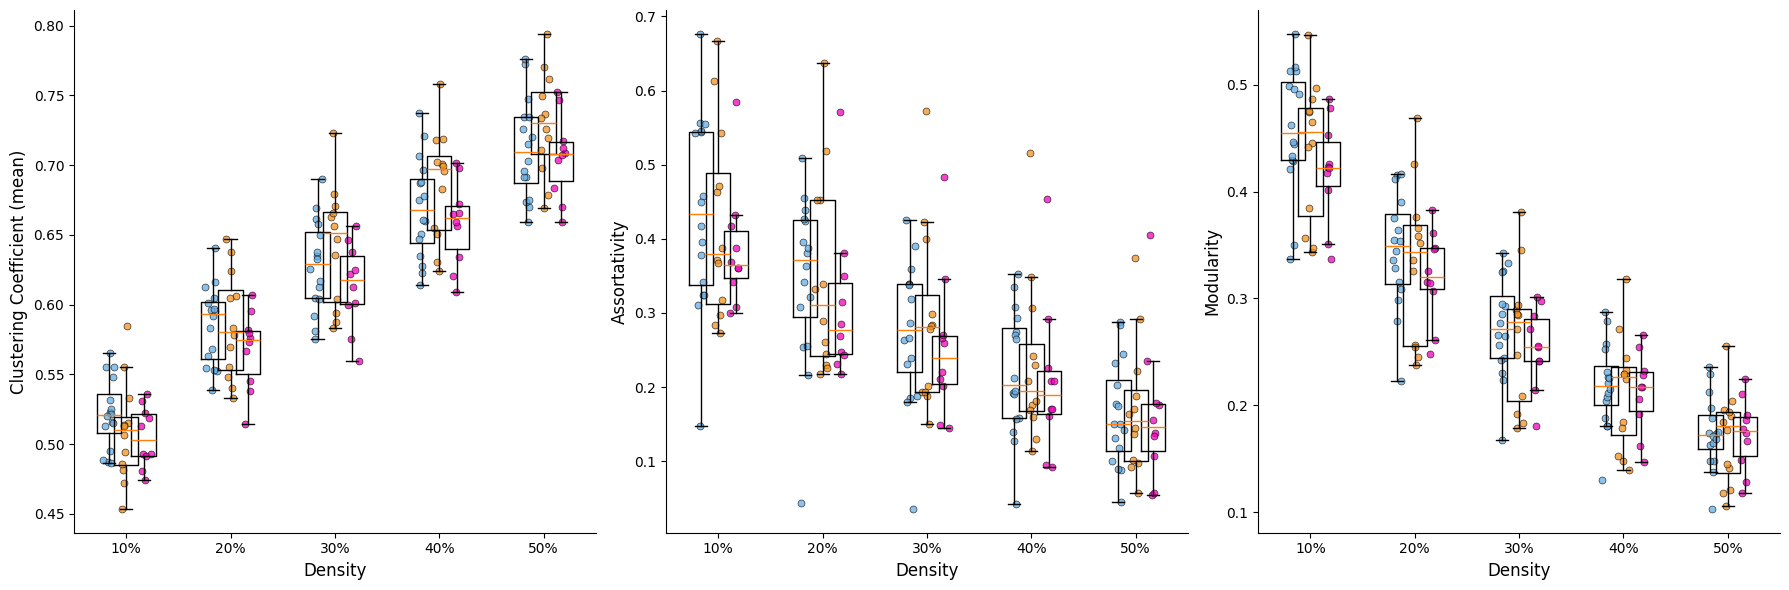

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color scheme
colors = ['#65AEE5', '#F39220', '#F004BB']

# Load and preprocess the datasets
datasetA1 = lam_g1[:, 1:10:2]
datasetA2 = lam_g2[:, 1:10:2]
datasetA3 = lam_g3[:, 1:10:2]

datasetB1 = clc_g1[:, 1:10:2]
datasetB2 = clc_g2[:, 1:10:2]
datasetB3 = clc_g3[:, 1:10:2]

datasetC1 = ass_g1[:, 1:10:2]
datasetC2 = ass_g2[:, 1:10:2]
datasetC3 = ass_g3[:, 1:10:2]

datasetD1 = mod_g1[:, 1:10:2]
datasetD2 = mod_g2[:, 1:10:2]
datasetD3 = mod_g3[:, 1:10:2]

# Define the ticks and labels
ticks = ['10%', '20%', '30%', '40%', '50%']
group = ['Pre','Mid','Post']

# Create DataFrames for each dataset
dfA1 = pd.DataFrame(datasetA1, columns=ticks)
dfA2 = pd.DataFrame(datasetA2, columns=ticks)
dfA3 = pd.DataFrame(datasetA3, columns=ticks)

dfB1 = pd.DataFrame(datasetB1, columns=ticks)
dfB2 = pd.DataFrame(datasetB2, columns=ticks)
dfB3 = pd.DataFrame(datasetB3, columns=ticks)

dfC1 = pd.DataFrame(datasetC1, columns=ticks)
dfC2 = pd.DataFrame(datasetC2, columns=ticks)
dfC3 = pd.DataFrame(datasetC3, columns=ticks)

dfD1 = pd.DataFrame(datasetD1, columns=ticks)
dfD2 = pd.DataFrame(datasetD2, columns=ticks)
dfD3 = pd.DataFrame(datasetD3, columns=ticks)

# Prepare values and positions for boxplots
def prepare_boxplot_data(df1, df2, df3, ticks):
    vals1, vals2, vals3, xs1, xs2, xs3 = [], [], [], [], [], []
    for i, col in enumerate(df1.columns):
        vals1.append(df1[col].values)
        vals2.append(df2[col].values)
        vals3.append(df3[col].values)
        xs1.append(np.random.normal(i * 3 - 0.5, 0.08, df1[col].values.shape[0]))
        xs2.append(np.random.normal(i * 3, 0.08, df2[col].values.shape[0]))
        xs3.append(np.random.normal(i * 3 + 0.5, 0.08, df3[col].values.shape[0]))
    return vals1, vals2, vals3, xs1, xs2, xs3

valsB1, valsB2, valsB3, xsB1, xsB2, xsB3 = prepare_boxplot_data(dfB1, dfB2, dfB3, ticks)
valsC1, valsC2, valsC3, xsC1, xsC2, xsC3 = prepare_boxplot_data(dfC1, dfC2, dfC3, ticks)
valsD1, valsD2, valsD3, xsD1, xsD2, xsD3 = prepare_boxplot_data(dfD1, dfD2, dfD3, ticks)

# Create subplots
fig, (ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting boxplots and scatter plots for each subplot
def plot_box_scatter(ax, vals1, vals2, vals3, xs1, xs2, xs3, names, ylabel, xlabel):
    bp1 = ax.boxplot(vals1, labels=names, positions=np.array(range(len(vals1))) * 3 - 0.5, sym='', widths=0.7)
    bp2 = ax.boxplot(vals2, labels=names, positions=np.array(range(len(vals2))) * 3, sym='', widths=0.7)
    bp3 = ax.boxplot(vals3, labels=names, positions=np.array(range(len(vals3))) * 3 + 0.5, sym='', widths=0.7)
    
    ax.scatter(xs1, vals1, alpha=0.75, color=colors[0], s=25, linewidth=0.5, edgecolors='k')
    ax.scatter(xs2, vals2, alpha=0.75, color=colors[1], s=25, linewidth=0.5, edgecolors='k')
    ax.scatter(xs3, vals3, alpha=0.75, color=colors[2], s=25, linewidth=0.5, edgecolors='k')
    
    ax.set_xticks(range(0, len(ticks) * 3, 3))
    ax.set_xticklabels(ticks)
    ax.set_xlim(-1.5, len(ticks) * 3 - 1.5)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)

plot_box_scatter(ax2, valsB1, valsB2, valsB3, xsB1, xsB2, xsB3, ticks, "Clustering Coefficient (mean)", "Density")
plot_box_scatter(ax3, valsC1, valsC2, valsC3, xsC1, xsC2, xsC3, ticks, "Assortativity", "Density")
plot_box_scatter(ax4, valsD1, valsD2, valsD3, xsD1, xsD2, xsD3, ticks, "Modularity", "Density")

# Add a unified legend
# handles, labels = group_label['Pre','Mid','Post'] # ('Pre','Mid','Post')  ax2.get_legend_handles_labels()
# fig.legend(handles, labels, prop={'size': 12})
# ax2.get_legend_handles_labels('Pre','Mid','Post')
# Adjust layout and save the figure
sns.despine(right=True)

plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/boxplot'+analysis+'.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

plt.show()


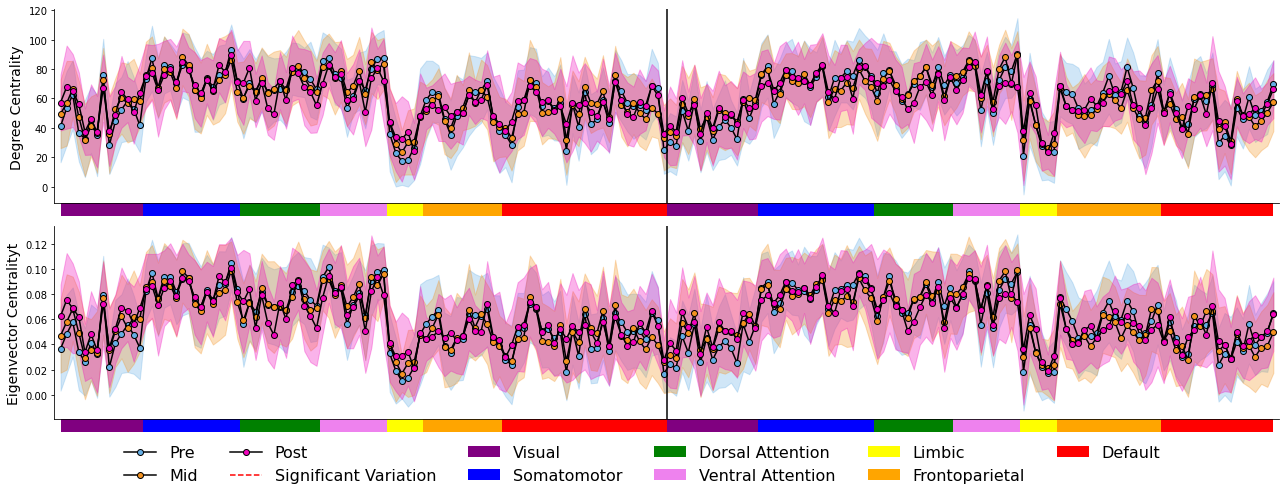

In [40]:
# permutation + multiple comparison (ONE TIME)
# deg
pvals_deg = np.zeros((200,))
for i in range(200):
    pvals_deg[i] = perm_test_three(deg_l_g1[:,i], deg_l_g2[:,i], deg_l_g3[:,i], 10000)
reject_deg, pvals_corrected_deg, alphacSidak, alphacBonf = smm.multipletests(pvals_deg, 0.01, method='fdr_bh') 
# clc
pvals_clc = np.zeros((200,))
for i in range(200):
    pvals_clc[i] = perm_test_three(clc_l_g1[:,i], clc_l_g2[:,i], clc_l_g3[:,i], 10000)
reject_clc, pvals_corrected_clc, alphacSidak, alphacBonf = smm.multipletests(pvals_clc, 0.01, method='fdr_bh') 
# eig
pvals_eig = np.zeros((200,))
for i in range(200):
    pvals_eig[i] = perm_test_three(eig_l_g1[:,i], eig_l_g2[:,i], eig_l_g3[:,i], 10000)
reject_eig, pvals_corrected_eig, alphacSidak, alphacBonf = smm.multipletests(pvals_eig, 0.01, method='fdr_bh') 

np.where(reject_deg)[0]
np.where(reject_clc)[0]
np.where(reject_eig)[0]
#%%
mean_A1 = np.mean(deg_l_g1, axis=0)
std_A1 = np.std(deg_l_g1, axis=0)
mean_A2 = np.mean(deg_l_g2, axis=0)
std_A2 = np.std(deg_l_g2, axis=0)
mean_A3 = np.mean(deg_l_g3, axis=0)
std_A3 = np.std(deg_l_g3, axis=0)

mean_B1 = np.mean(clc_l_g1, axis=0)
std_B1 = np.std(clc_l_g1, axis=0)
mean_B2 = np.mean(clc_l_g2, axis=0)
std_B2 = np.std(clc_l_g2, axis=0)
mean_B3 = np.mean(clc_l_g3, axis=0)
std_B3 = np.std(clc_l_g3, axis=0)

mean_C1 = np.mean(eig_l_g1, axis=0)
std_C1 = np.std(eig_l_g1, axis=0)
mean_C2 = np.mean(eig_l_g2, axis=0)
std_C2 = np.std(eig_l_g2, axis=0)
mean_C3 = np.mean(eig_l_g3, axis=0)
std_C3 = np.std(eig_l_g3, axis=0)

mean_D1 = np.mean(eff_l_g1, axis=0)
std_D1 = np.std(eff_l_g1, axis=0)
mean_D2 = np.mean(eff_l_g2, axis=0)
std_D2 = np.std(eff_l_g2, axis=0)
mean_D3 = np.mean(eff_l_g3, axis=0)
std_D3 = np.std(eff_l_g3, axis=0)

x = np.arange(len(mean_A1))

fig, (ax1, ax3) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(18, 7))

plt.sca(ax1)
ebA1 = ax1.plot(x, mean_A1, '-ko', label=group_label[0], markerfacecolor=color[0])
ax1.fill_between(x, mean_A1 - std_A1, mean_A1 + std_A1, color=color[0], alpha=0.3)
ebA2 = ax1.plot(x, mean_A2, '-ko', label=group_label[1], markerfacecolor=color[1])
ax1.fill_between(x, mean_A2 - std_A2, mean_A2 + std_A2, color=color[1], alpha=0.3)
ebA3 = ax1.plot(x, mean_A3, '-ko', label=group_label[2], markerfacecolor=color[2])
ax1.fill_between(x, mean_A3 - std_A3, mean_A3 + std_A3, color=color[2], alpha=0.3)
plt.ylabel("Degree Centrality", fontweight='normal', fontsize=14)
plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5)
for i in np.where(reject_deg)[0]:
    plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)

plt.xlim([-1, 200])
y_min, y_max = ax1.get_ylim()
h = (y_max-y_min)/15; i = y_min-h # intercept
# ticks and labels along the bottom edge are off
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# Add rectangle objects as tick labels for better visualization
ax1.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
ax1.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))

# =============================================================================
# plt.sca(ax2)
# ebB1 = ax2.plot(x, mean_B1, '-ko', label=group_label[0], markerfacecolor=c1, markersize=5)
# ax2.fill_between(x, mean_B1 - std_B1, mean_B1 + std_B1, color=c1, alpha=0.3)
# ebB2 = ax2.plot(x, mean_B2, '-ko', label=group_label[1], markerfacecolor=c2)
# ax2.fill_between(x, mean_B2 - std_B2, mean_B2 + std_B2, color=c2, alpha=0.3)
# plt.ylabel("Clustering Coeeficient", fontweight='normal', fontsize=14)
# plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5)
# for i in np.where(reject_clc)[0]:
#     plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)
# 
# plt.xlim([-1, 200])
# y_min, y_max = ax2.get_ylim()
# h = (y_max-y_min)/15; i = y_min-h
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# ax2.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
# ax2.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
# =============================================================================

plt.sca(ax3)
ebC1 = ax3.plot(x, mean_C1, '-ko', label=group_label[0], markerfacecolor=color[0])
ax3.fill_between(x, mean_C1 - std_C1, mean_C1 + std_C1, color=color[0], alpha=0.3)
ebC2 = ax3.plot(x, mean_C2, '-ko', label=group_label[1], markerfacecolor=color[1])
ax3.fill_between(x, mean_C2 - std_C2, mean_C2 + std_C2, color=color[1], alpha=0.3)
ebC3 = ax3.plot(x, mean_C3, '-ko', label=group_label[2], markerfacecolor=color[2])
ax3.fill_between(x, mean_C3 - std_C3, mean_C3 + std_C3, color=color[2], alpha=0.3)
plt.ylabel("Eigenvector Centralityt", fontweight='normal', fontsize=14)
plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5)
for i in np.where(reject_eig)[0]:
    plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)
plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5, label='Significant Variation')

plt.xlim([-1, 200])
y_min, y_max = ax3.get_ylim()
h = (y_max-y_min)/15; i = y_min-h
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0, label='Visual'))
ax3.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0, label='Somatomotor'))
ax3.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0, label='Dorsal Attention'))
ax3.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0, label='Ventral Attention'))
ax3.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0, label='Limbic'))
ax3.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0, label='Frontoparietal'))
ax3.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0, label='Default'))
ax3.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
ax3.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))

# =============================================================================
# plt.sca(ax4)
# ebD1 = ax4.plot(x, mean_D1, '-ko', label=group_label[0], markerfacecolor=c1)
# ax4.fill_between(x, mean_D1 - std_D1, mean_D1 + std_D1, color=c1, alpha=0.3)
# ebD2 = ax4.plot(x, mean_D2, '-ko', label=group_label[1], markerfacecolor=c2)
# ax4.fill_between(x, mean_D2 - std_D2, mean_D2 + std_D2, color=c2, alpha=0.3)
# plt.ylabel("Nodal Efficiency", fontweight='normal', fontsize=14)
# plt.axvline(x=99.5, color='k', linestyle='-', linewidth=1.5, label='L-R Separator')
# for i in np.where(reject_deg)[0]:
#     plt.axvline(x=i, color='r', linestyle='--', linewidth=1.5)
# 
# 
# plt.xlim([-1, 200])
# y_min, y_max = ax4.get_ylim()
# h = (y_max-y_min)/15; i = y_min-h
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# ax4.add_patch(patches.Rectangle((0, i), width=13.5-0, height=h, facecolor='purple', clip_on=False, linewidth = 0, label='Visual'))
# ax4.add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='blue', clip_on=False, linewidth = 0, label='Somatomotor'))
# ax4.add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='green', clip_on=False, linewidth = 0, label='Dorsal Attention'))
# ax4.add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='violet', clip_on=False, linewidth = 0, label='Ventral Attention'))
# ax4.add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0, label='Limbic'))
# ax4.add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='orange', clip_on=False, linewidth = 0, label='Frontoparietal'))
# ax4.add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='red', clip_on=False, linewidth = 0, label='Default'))
# ax4.add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='purple', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='blue', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='green', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='violet', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='yellow', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='orange', clip_on=False, linewidth = 0))
# ax4.add_patch(patches.Rectangle((180.5, i), width=199-180.5, height=h, facecolor='red', clip_on=False, linewidth = 0))
# =============================================================================

plt.legend(prop={'size':16}, ncol=6, frameon=False, bbox_to_anchor=(.48, -.06), loc='upper center')

# =============================================================================
# # Annotate Subplots in a Figure with A, B, C, D (as well as L & R)
# for n, ax in enumerate((ax1, ax2, ax3, ax4)):
#     ax.text(-0.04, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, 
#             size=18, weight='bold')
#     ax.text(0.258, 1.015, 'L', transform=ax.transAxes, 
#             size=14, weight='regular')
#     ax.text(0.731, 1.015, 'R', transform=ax.transAxes, 
#             size=14, weight='regular')
# =============================================================================

sns.despine(right=True) # removes right and top axis lines (top, bottom, right, left)

# Adjust the layout of the plot
plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/shaded_errorbar'+analysis+'.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

plt.show()

#%% finding the hubs
# -----------------------------------------
# based on degree centrality (>=20) of mean corr matrix for density of 5%, 
# the follwing regions are top ~10 percent (hubs)


color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['cream']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['cream']*6) + (['orange']*17) + (['red']*19)

dc_g1 = degree.degrees_und(bin_g1_mean)
dc_g2 = degree.degrees_und(bin_g2_mean)
dc_g3 = degree.degrees_und(bin_g3_mean)

# Group 1  
sig_g1 = np.where(dc_g1 >= 105)[0]
coords_g1 = list(atlas.region_coords[i] for i in sig_g1)
color_g1 = list(color[i] for i in sig_g1)
size_g1 = list(int(dc_g1[i]) for i in sig_g1)
size_g1 = [(x - 80)*15 for x in size_g1]
label_g1 = list(str(i+1) for i in sig_g1)

view = plotting.view_markers( 
    coords_g1, color_g1, marker_size=np.array(size_g1)/15, marker_labels=label_g1) # marker_labels=labels
view.open_in_browser() 
view.save_as_html("surface_plotG1.html") 

# Group 2  
sig_g2 = np.where(dc_g2 >= 105)[0]
coords_g2 = list(atlas.region_coords[i] for i in sig_g2)
color_g2 = list(color[i] for i in sig_g2)
size_g2 = list(int(dc_g2[i]) for i in sig_g2)
size_g2 = [(x - 80)*15 for x in size_g2]
label_g2 = list(str(i+1) for i in sig_g2)

view = plotting.view_markers( 
    coords_g2, color_g2, marker_size=np.array(size_g2)/15, marker_labels=label_g2) 
view.open_in_browser() 
view.save_as_html("surface_plotG2.html")

# Group 3  
sig_g3 = np.where(dc_g3 >= 105)[0]
coords_g3 = list(atlas.region_coords[i] for i in sig_g3)
color_g3 = list(color[i] for i in sig_g3)
size_g3 = list(int(dc_g3[i]) for i in sig_g3)
size_g3 = [(x - 80)*15 for x in size_g3]
label_g3 = list(str(i+1) for i in sig_g3)

view = plotting.view_markers( 
    coords_g3, color_g3, marker_size=np.array(size_g3)/15, marker_labels=label_g3) 
view.open_in_browser() 
view.save_as_html("surface_plotG3.html")


/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_89561/223694543.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axx1 = sns.distplot(dc_g1, color='orange', label=group_label[0], **kwargs)
/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_89561/223694543.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

IndexError: list index out of range

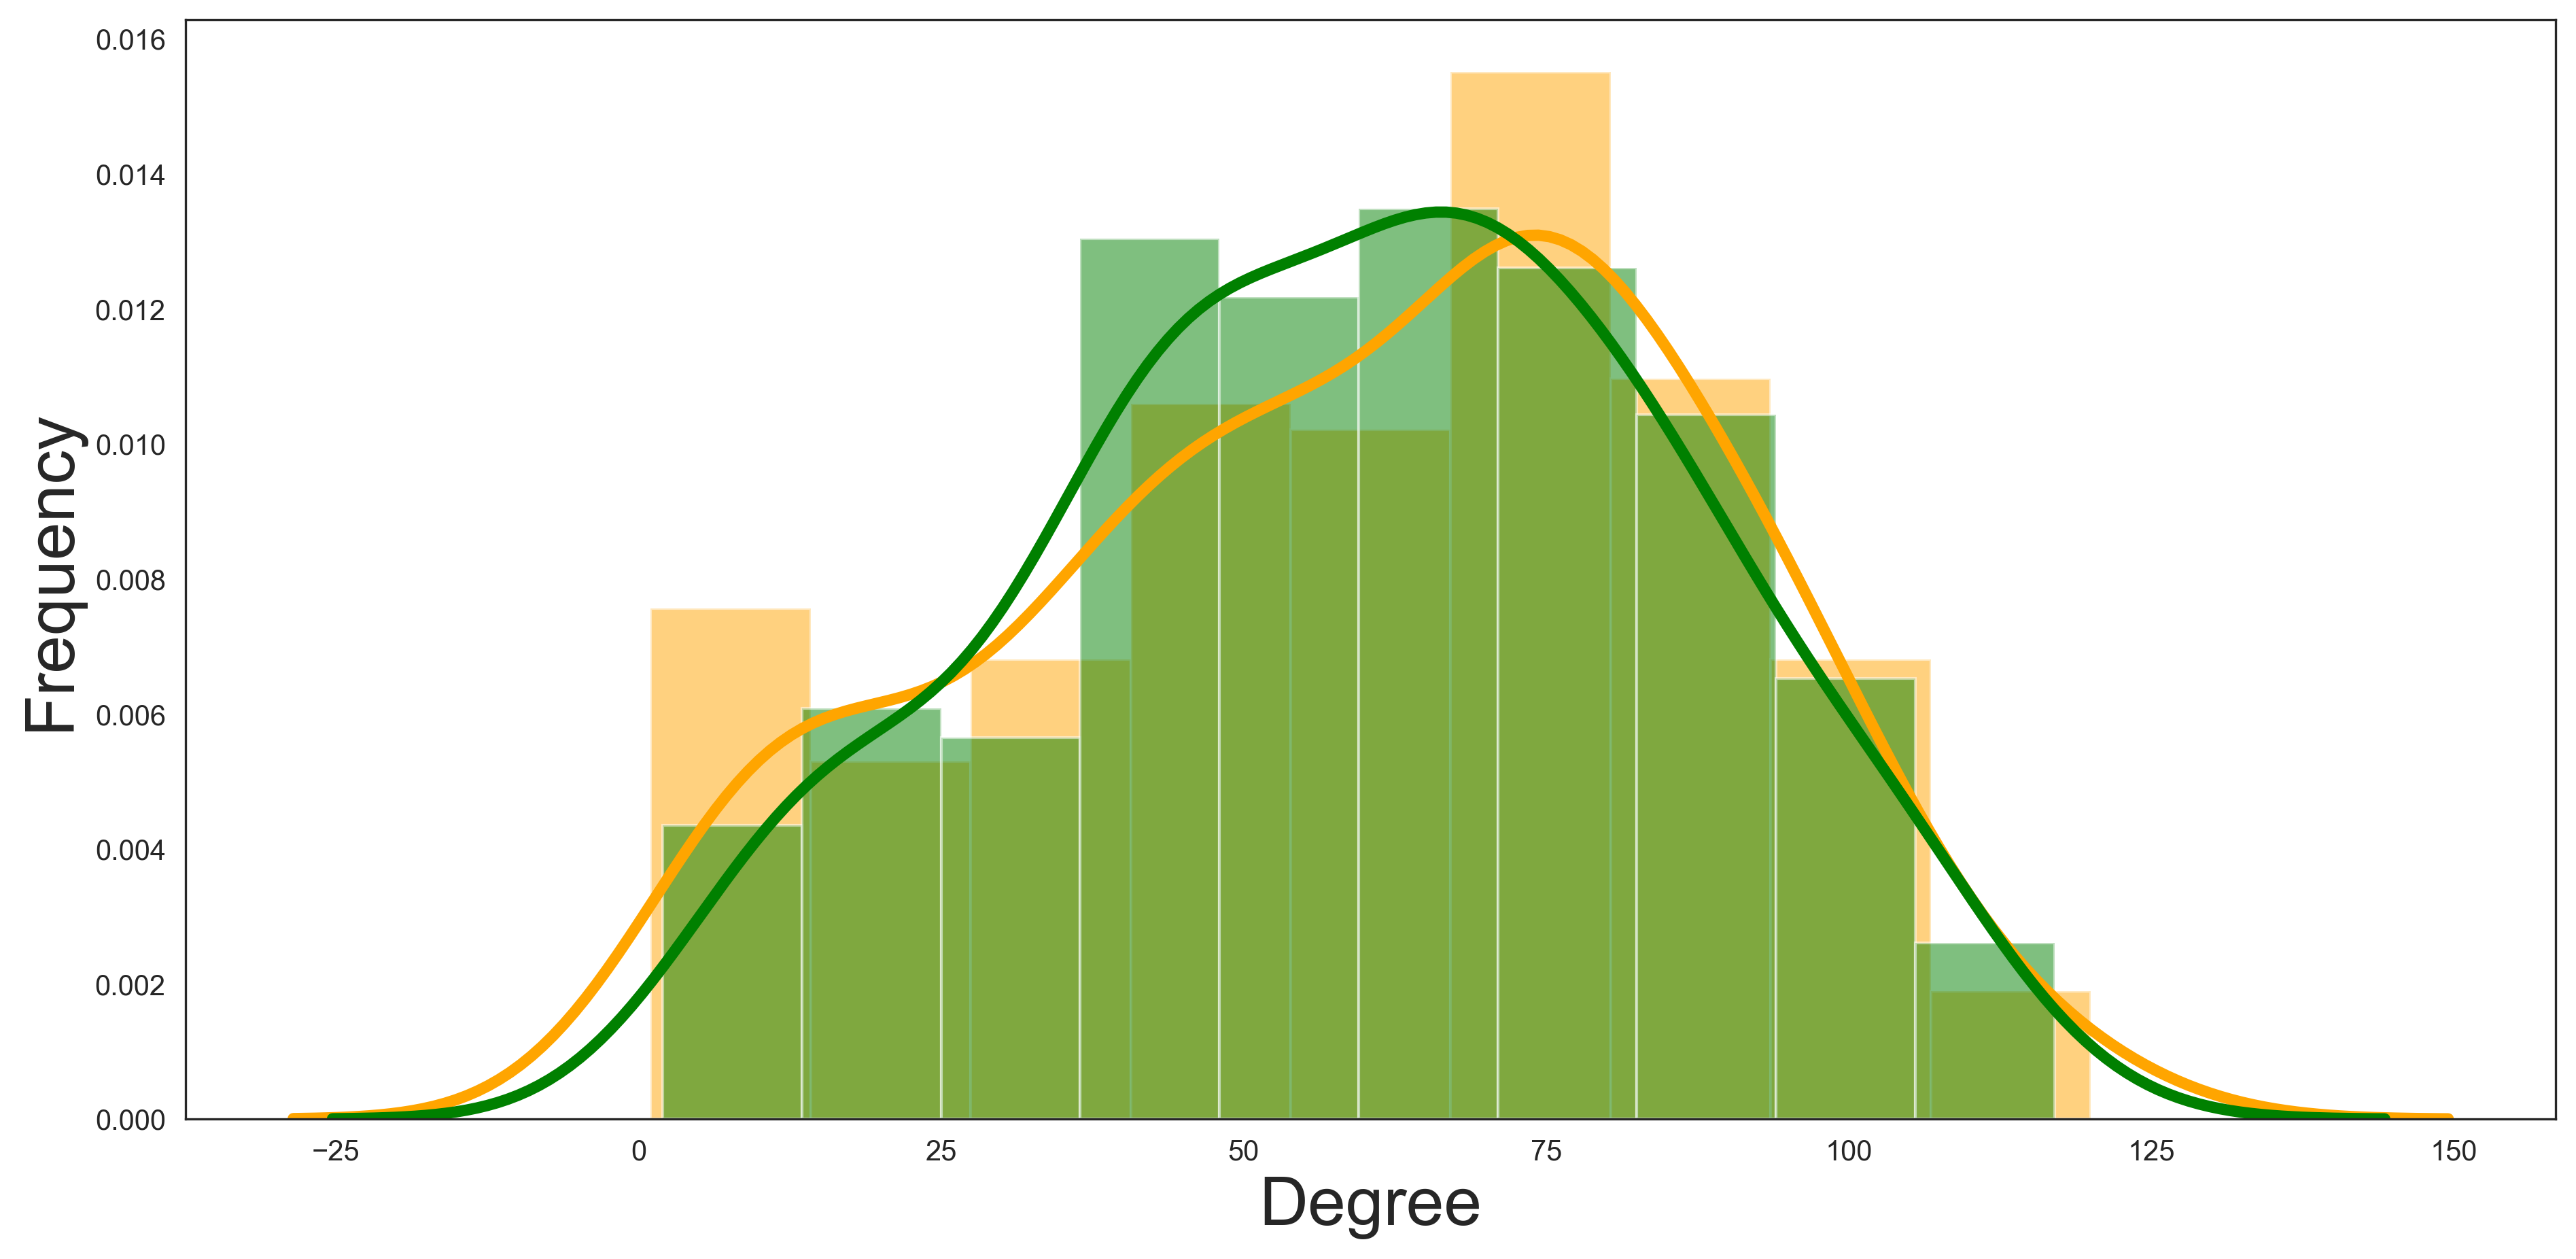

In [11]:
#%% 1.2) Distributions (degrees))
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':4})
plt.figure(figsize=(15,7), dpi= 300)
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Degree', fontsize=24)

dc_g1 = degree.degrees_und(bin_g1_mean)
dc_g2 = degree.degrees_und(bin_g2_mean)
dc_g5 = degree.degrees_und(bin_g5_mean) 

axx1 = sns.distplot(dc_g1, color='orange', label=group_label[0], **kwargs)
axx2 = sns.distplot(dc_g2, color='green', label=group_label[1], **kwargs)
axx3 = sns.distplot(dc_g5, color='blue', label=group_label[2], **kwargs) # distplot displot
#plt.axvline(x=np.mean(list(dc_g1)), linestyle='--', color='blue', label=f"Mean: {np.mean(list(dc_g1)):.5}", linewidth=2)
#plt.axvline(x=np.mean(list(dc_g2)), linestyle='--', color='darkred', label=f"Mean: {np.mean(list(dc_g2)):.5}", linewidth=2)
#plt.xlim(-0.05, 0.9) # cp

axx1.set_xticklabels([str(i) for i in axx1.get_xticks()], fontsize = 20)
axx2.set_yticklabels([str(i) for i in axx2.get_yticks()], fontsize = 20)
axx3.set_yticklabels([str(i) for i in axx3.get_yticks()], fontsize = 20)

# axx1.set_yticklabels(axx1.get_yticks(), size = 20) 
# axx1.set_xticklabels(axx1.get_xticks(), size = 20) 
plt.legend(prop={'size':20})

# Adjust the layout of the plot
plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/dist_'+analysis+'.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

### G1 Modularity data

In [86]:
#%% MODULARITY
n_set = 3
# 200xn

# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g1_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_g1']; 
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g2_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_g2']; 
# S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g3_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_g3'];

# # Our method

S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_prefes_1.2,-1.0.mat', squeeze_me=True)['S_g1'];  
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_prenfes_1.2,-1.0.mat', squeeze_me=True)['S_g2'];  
S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_postfes_1.2,-1.0.mat', squeeze_me=True)['S_g3'];

# var_s1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/var_s1_g1.mat', squeeze_me=True)['S_g1_temp']; #S_sci
# var_s2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/var_s2_g1.mat', squeeze_me=True)['S_g2_temp']; #S_sci
# var_s3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/var_s3_g1.mat', squeeze_me=True)['S_g3_temp']; #S_sci
# S_g1_mode
# S_g1_mode = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/var_s1_mode.mat', squeeze_me=True)['S_g1_mode']; #S_hc
# S_g2_mode = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/var_s2_mode.mat', squeeze_me=True)['S_g2_mode']; #S_sci
# S_g3_mode = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/var_s3_mode.mat', squeeze_me=True)['S_g3_mode']; #S_sci

communities = [S_g1, S_g2, S_g3]
# communities = [S_g1_mode, S_g2_mode, S_g3_mode]

In [14]:
# # # 200xn 
# n_set = 2
# # 
# # Lee community structure
# # S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g1_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_g1']; 
# # S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g2_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_g2']; 

# # Our method
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_prefes_1.2,-1.0.mat', squeeze_me=True)['S_g1']; 
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_postfes_1.2,-1.0.mat', squeeze_me=True)['S_g2']; 

# communities = [S_g1, S_g2]

In [87]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings
group_label = ['Pre FES', 'Pre NFES', 'Post FES']
# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) 

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()
# 1=pre_fes; 2=pre_nfes; 3=post_fes

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc): 
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc




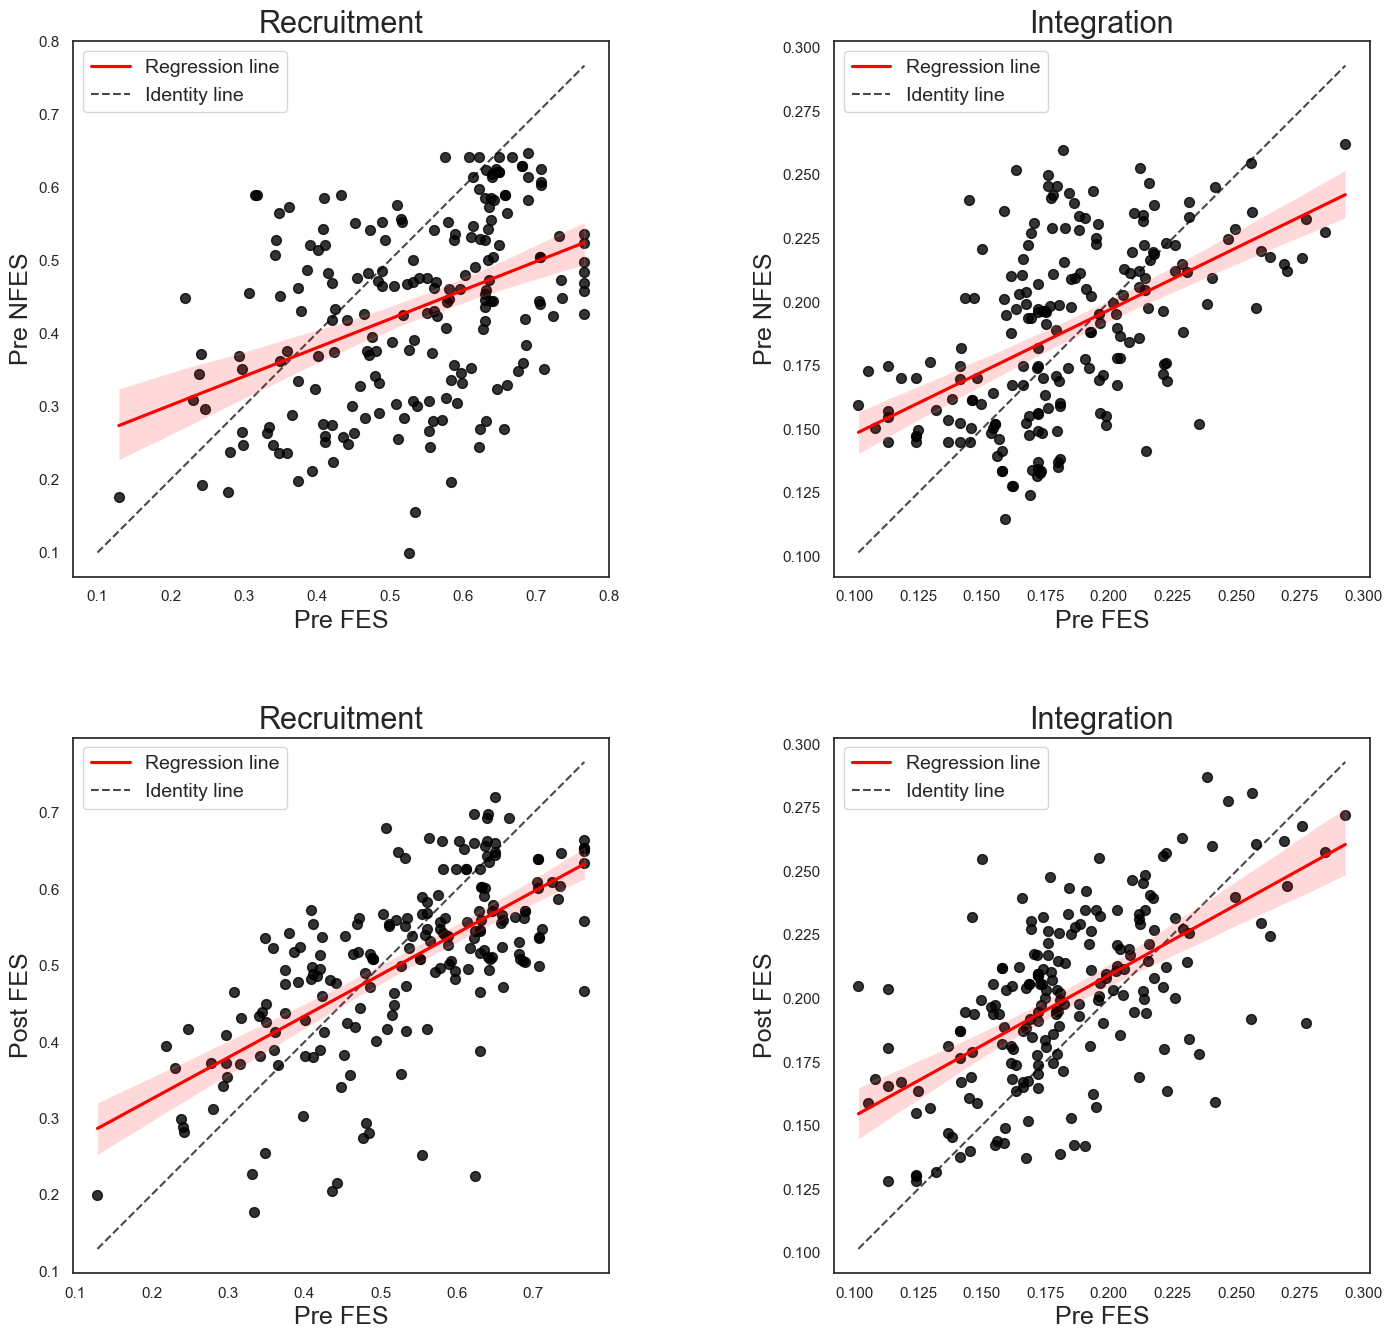

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 16))
(ax1, ax2), (ax3, ax4) = axes
sns.set(style='white')

# Function to plot regression with identity line
def plot_regression(ax, x, y, xlabel, ylabel, title):
    sns.regplot(x=x, y=y, ci=95, scatter_kws={"color": "black", "s": 50}, 
                line_kws={"color": "red", 'label': 'Regression line'}, ax=ax)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_title(title, fontsize=22)

    # Define identity line limits
    lims = [min(np.min(x), np.min(y)), max(np.max(x), np.max(y))]
    ax.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.axis('square')
    ax.legend(loc="best", fontsize=14)

# PreFES vs PreNFES
plot_regression(ax1, recruitment[0], recruitment[1], group_label[0], group_label[1], 'Recruitment')
perm_test(recruitment[0], recruitment[1], 30000)

plot_regression(ax2, integration[0], integration[1], group_label[0], group_label[1], 'Integration')
perm_test(integration[0], integration[1], 30000)

# PreFES vs PostFES
plot_regression(ax3, recruitment[0], recruitment[2], group_label[0], group_label[2], 'Recruitment')
perm_test(recruitment[0], recruitment[2], 30000)

plot_regression(ax4, integration[0], integration[2], group_label[0], group_label[2], 'Integration')
perm_test(integration[0], integration[2], 30000)

# Adjust layout and show the figure
# plt.tight_layout(pad=2.0)

plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace=0.2)

plt.show()



# fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/scatter_int&rec'+analysis+'.pdf',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/recruitment_control.npy', recruitment[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/integration_control.npy', integration[0])


np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/recruitment_prefes.npy', recruitment[0])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/integration_prefes.npy', integration[0])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/recruitment_prenfes.npy', recruitment[1])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/integration_prenfes.npy', integration[1])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/recruitment_postfes.npy', recruitment[2])
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/integration_postfes.npy', integration[2])
 


In [89]:
def perm_test_integration(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    int_s1 = communitymeasures.integration(s1, static_communities)
    int_s2 = communitymeasures.integration(s2, static_communities)
    diff = np.abs(int_s2 - int_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        int_sp1 = communitymeasures.integration(sp1, static_communities)
        int_sp2 = communitymeasures.integration(sp2, static_communities)
        k += diff < np.abs(int_sp2 - int_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_recruitment(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    rec_s1 = communitymeasures.recruitment(s1, static_communities)
    rec_s2 = communitymeasures.recruitment(s2, static_communities)
    diff = np.abs(rec_s2 - rec_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
        rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
        k += diff < np.abs(rec_sp2 - rec_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

# run for a given permutation number (nmc) var_s1 var_s2 var_s3
# pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100) ## Int PreFES - PreNFES
pvalue_int1 = perm_test_integration(S_g1, S_g3, nmc=100) ## Int PreFES - PostFES
# pvalue_rec = perm_test_recruitment(S_g1, S_g2, nmc=100) ## ## Rec PreFES - PreNFES
pvalue_rec1 = perm_test_recruitment(S_g1, S_g3, nmc=100) ## ## Rec PreFES - PostFES

# perm_test_allegiance_new(S_g1_mode, S_g2_mode, var_s1, var_s2, 100)
# pvalue_int = perm_test_integration(S_g1_mode, S_g2_mode, var_s1, var_s2, nmc=100) ## Int PreFES - PreNFES
# pvalue_int1 = perm_test_integration(S_g1_mode, S_g3_mode, var_s1, var_s3, nmc=100) ## Int PreFES - PostFES
# pvalue_rec = perm_test_recruitment(S_g1_mode, S_g2_mode, var_s1, var_s2, nmc=100) ## ## Rec PreFES - PreNFES
# pvalue_rec1 = perm_test_recruitment(S_g1_mode, S_g3_mode, var_s1, var_s3, nmc=100) ## ## Rec PreFES - PostFES
# pvalue_int --> 200x200

# Automatic atlas fetching
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
label = atlas.labels.astype('U') # covert array of bytes to array of strings

color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)

permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90


## SMN Slicing

In [90]:
# print(f' shape :{(S_g1_mode.shape)} {(var_s1.shape)}, type :{type(S_g3_mode)} {type(var_s3)}')
# print(f' shape :{(S_g1_mode.shape)}-{(S_g2_mode.shape)}-{(S_g3_mode.shape)}-{(var_s1.shape)}-{(var_s2.shape)}-{(var_s3.shape)}')
print(f'shape :{(S_g1.shape)}-{(S_g2.shape)}-{(S_g3.shape)}')
#  shape :(200, 10)-(200, 10)-(200, 10)-(200, 10, 100)-(200, 10, 100)-(200, 10, 100)

shape :(200, 14)-(200, 10)-(200, 16)


In [91]:
slice1 = S_g1[15:31, :]  
slice2 = S_g1[116:135, :] 
Sg1_SMN = np.vstack((slice1, slice2))
print(f'SMN PreFES shape: {Sg1_SMN.shape}') 

slice1 = S_g3[15:31, :]  
slice2 = S_g3[116:135, :] 
Sg3_SMN = np.vstack((slice1, slice2))
print(f'SMN PostFES shape: {Sg3_SMN.shape}') 

SMN PreFES shape: (35, 14)
SMN PostFES shape: (35, 16)


In [92]:
# varslice1 = var_s1[15:31, :, :]  
# varslice2 = var_s1[116:135, :, :]   
# var_s1_SMN = np.vstack((varslice1, varslice2))
# print(var_s1_SMN.shape)

# varslice1 = var_s3[15:31, :, :]  
# varslice2 = var_s3[116:135, :, :]   
# var_s3_SMN = np.vstack((varslice1, varslice2))
# print(var_s3_SMN.shape)


In [93]:
x_rec = recruitment[0] #Pre
y_rec = recruitment[1]
z_rec = recruitment[2] #Post

x_in = integration[0]
y_in = integration[1]
z_in = integration[2]

slice1 = x_rec[15:31]   
slice2 = x_rec[116:135]  
x_rec_SMN = np.concatenate((slice1, slice2))
print(x_rec_SMN.shape) 

slice1 = z_rec[15:31]   
slice2 = z_rec[116:135]  
z_rec_SMN = np.concatenate((slice1, slice2))
print(x_rec_SMN.shape) 

slice1 = x_in[15:31]   
slice2 = x_in[116:135]  
x_in_SMN = np.concatenate((slice1, slice2))
print(x_in_SMN.shape) 

slice1 = z_in[15:31]   
slice2 = z_in[116:135]  
z_in_SMN = np.concatenate((slice1, slice2))
print(z_in_SMN.shape) 

# x_rec z_rec x_in z_in

(35,)
(35,)
(35,)
(35,)


In [94]:
# PreFES, PreNFES, MidFES, MidNFES, PostFES, PostNFES
# data_matrices_weighted = [corr_g1_mean, corr_g2_mean, corr_g3_mean, corr_g4_mean, corr_g5_mean, corr_g6_mean]
# data_matrices_binarized = [bin_g1_mean, bin_g2_mean, bin_g3_mean, bin_g4_mean, bin_g5_mean, bin_g6_mean]

# corr_g1_mean corr_g5_mean
corr_g1_mean.shape

(200, 200)

In [95]:
s1 = corr_g1_mean[15:31, :]  
s2 = corr_g1_mean[116:135, :] 
FC_PreFES_SMN = np.vstack((s1, s2))
print(f'FC SMN PreFES: {FC_PreFES_SMN.shape}') 

FC SMN PreFES: (35, 200)


In [96]:
#PreFES
# Slice rows and columns from 15:31 and 116:135
s1 = corr_g1_mean[15:31, 15:31]     # Shape (16, 16)
s2 = corr_g1_mean[15:31, 116:135]   # Shape (16, 19)
s3 = corr_g1_mean[116:135, 15:31]   # Shape (19, 16)
s4 = corr_g1_mean[116:135, 116:135] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

fc_smn_matrix_prefes = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# Print the shape of the resulting matrix
print("FC of SMN matrix PreFES:", fc_smn_matrix_prefes.shape)

# PostFES
# Slice rows and columns from 15:31 and 116:135
s1 = corr_g5_mean[15:31, 15:31]     # Shape (16, 16)
s2 = corr_g5_mean[15:31, 116:135]   # Shape (16, 19)
s3 = corr_g5_mean[116:135, 15:31]   # Shape (19, 16)
s4 = corr_g5_mean[116:135, 116:135] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

fc_smn_matrix_postfes = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# Print the shape of the resulting matrix
print("FC of SMN matrix PostFES:", fc_smn_matrix_postfes.shape)

FC of SMN matrix PreFES: (35, 35)
FC of SMN matrix PostFES: (35, 35)


In [97]:
# x_rec_SMN, z_rec_SMN, x_in_SMN, z_in_SMN | Pre Post

df1 = pd.DataFrame(fc_smn_matrix_prefes)
df2 = pd.DataFrame(fc_smn_matrix_postfes)
df3 = pd.DataFrame(x_rec_SMN)
df4 = pd.DataFrame(z_rec_SMN)
df5 = pd.DataFrame(x_in_SMN)
df6 = pd.DataFrame(z_in_SMN)

output_file = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/smn_matrices.xlsx"
with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
    df1.to_excel(writer, sheet_name="FC_PreFES", index=False)
    df2.to_excel(writer, sheet_name="FC_PostFES", index=False)
    df3.to_excel(writer, sheet_name="RC_Pre", index=False)
    df4.to_excel(writer, sheet_name="RC_Post", index=False)
    df5.to_excel(writer, sheet_name="IC_Pre", index=False) 
    df6.to_excel(writer, sheet_name="IC_Post", index=False)

print(f"SMN matrix file saved successfully.")

SMN matrix file saved successfully.


In [98]:
static_communities = np.zeros((35,))
pvalue_int1 = perm_test_integration(Sg1_SMN, Sg3_SMN, nmc=100) ## Int PreFES - PostFES
# pvalue_rec = perm_test_recruitment(S_g1, S_g2, nmc=100) ## ## Rec PreFES - PreNFES
pvalue_rec1 = perm_test_recruitment(Sg1_SMN, Sg3_SMN, nmc=100) ##

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/teneto/communitymeasures/integration.py:47: RuntimeWarning: Mean of empty slice
  integration_coeff[i] = np.nanmean(alleg[i, staticcommunities != statcom])


permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90


In [33]:
# static_communities = np.zeros((35,))
# pvalue_int1 = perm_test_integration(Sg1_mode_SMN, Sg3_mode_SMN, var_s1_SMN, var_s3_SMN, nmc=100) ## Int PreFES - PostFES
# pvalue_rec1 = perm_test_recruitment(Sg1_mode_SMN, Sg3_mode_SMN, var_s1_SMN, var_s3_SMN, nmc=100) ## ## Rec PreFES - PostFES
# # pvalue_int --> 35x35

In [100]:
# diff_rec_abs = abs(recruitment[0] - recruitment[1]) 
diff_rec_abs1 = abs(recruitment[0] - recruitment[2])

# diff_int_abs = abs(integration[0] - integration[1]) 
diff_int_abs1 = abs(integration[0] - integration[2])

diff_rec1 = diff_rec_abs1 
diff_int1 = diff_int_abs1 
idx = 0
# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1
        
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
# Recruitment pre-post
sig_rec2 = np.where((diff_rec1 >= 0.0))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2]
# color_g2 = [color[i] for i in sig_rec2]
# size_g2 = [int(diff_rec[i] * 100) for i in sig_rec2]
idx=idx+1
plot_markers(coords_g2, color_g2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)
# color_gb

# Integration pre-post
sig_int4 = np.where((diff_int1 >= 0.0) )[0] #& (pvalue_int1 == 0)
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

idx = idx+1
plot_markers(coords_g4, color_g4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View 1 = Rec PreFES vs PostFES
# View 2 = Int PreFES vs PostFES

View: 1
View: 2


In [101]:
# x_rec z_rec x_in z_in
print(f' shape :{(x_rec.shape)} {(z_rec.shape)}, type :{type(x_in)} {type(z_in)}')

 shape :(200,) (200,), type :<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [102]:
diff_rec_abs = abs(recruitment[0] - recruitment[1]) 
diff_rec_abs1 = abs(recruitment[0] - recruitment[2])

diff_int_abs = abs(integration[0] - integration[1]) 
diff_int_abs1 = abs(integration[0] - integration[2])


diff_rec = diff_rec_abs
diff_rec1 = diff_rec_abs1
diff_int = diff_int_abs
diff_int1 = diff_int_abs1 
idx = 0

lime = (0, 1, 1)
cyan = (0, 1, 0)


# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1

        
# color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
#               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
        
# # Recruitment 1-2
# sig_rec = np.where((diff_rec >= 0.2) & (pvalue_rec == 0))[0]
# coords_g1 = [atlas.region_coords[i] for i in sig_rec]
# color_g1 = [color[i] for i in sig_rec]
# size_g1 = [int(diff_rec[i] * 100) for i in sig_rec]
# idx=idx+1
# plot_markers(coords_g1, color_g1, size_g1, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_prenfes' + analysis + '.html', idx)

# Recruitment 1-3
sig_rec2 = np.where((diff_rec1 >= 0.0))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
# sig_rec2 = np.where((diff_rec1 >= 0.2) & (pvalue_rec1 == 0))[0]
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2]
# color_g2 = [color[i] for i in sig_rec2]
# size_g2 = [int(diff_rec[i] * 100) for i in sig_rec2] color_gb color_g2
idx=idx+1
plot_markers(coords_g2, color_gb, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# # Integration 1-2
# sig_int3 = np.where((diff_int >= 0.1) & (pvalue_int == 0))[0]
# coords_g3 = [atlas.region_coords[i] for i in sig_int3]
# color_g3 = [color[i] for i in sig_int3]
# size_g3 = [int(diff_int[i] * 200) for i in sig_int3]
# idx=idx+1
# plot_markers(coords_g3, color_g3, size_g3, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_prenfes' + analysis + '.html', idx)

# Integration 1-3
sig_int4 = np.where((diff_int1 >= 0.0) )[0] #& (pvalue_int1 == 0) 
# sig_int4 = np.where((diff_int1 >= 0.1) & (pvalue_int1 == 0))[0]
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']

coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int[i] * 200) for i in filtered_sig_int4]

# coords_g4 = [atlas.region_coords[i] for i in sig_int4]
# # color_g4 = [color[i] for i in sig_int4] 
# color_g4 = [color[i] for i in sig_int4 if color[i] == 'blue']
# size_g4 = [int(diff_int[i] * 200) for i in sig_int4]
idx = idx+1
plot_markers(coords_g4, color_gb, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View 1 = Rec PreFES vs PreNFES
# View 2 = Rec PreFES vs PostFES
# View 3 = Int PreFES vs PreNFES
# View 4 = Int PreFES vs PostFES

View: 1
View: 2


In [68]:
# color_g4

In [59]:
# sig_int
# labels
# labels2
# size_g2 27-F 37-B 7Networks_RH_SomMot_5 7Networks_RH_SomMot_16
# 1-7 smnb | 8-16 smnf Rec


In [72]:
# color_g2
# pvalue_rec2 = perm_test_recruitment(S_g1, S_g3, nmc=100) ## ## Int\Rec

In [103]:
# print(f'1{np.shape(label_g2)}-{np.shape(coords_g2)}\n - {size_g2}\n')
# np.min(diff_int)
# print(f'{diff_int} \n\n{diff_rec}')
# {len(diff_rec)}
# x_r = [x for x in diff_rec if (x >= 0.2) & (pvalue_rec == 0) ] #(diff_rec >= 0.2)
# x_r = [x for x, p in zip(diff_rec, pvalue_rec) if (x >= 0.2) and (p == 0)]
# y_r = [x for x, p in zip(diff_rec, pvalue_rec) if (x >= 0.2) and (p == 0)]
# y_r = [x for x in diff_rec if x < 0]

# print(f'{pvalue_rec} \n\n{len(pvalue_rec)} \n\n')
# print(f'{pvalue_int} \n\n{len(pvalue_int)} ')

diff_rec = diff_rec_abs
diff_rec1 = diff_rec_abs1
# diff_rec2 = diff_rec_abs2
diff_int = diff_int_abs
diff_int1 = diff_int_abs1

# print(f'{len(diff_rec)} \n{len(diff_rec1)}')
# print(f'{len(diff_int)} \n{len(diff_int1)}')

print(f'Sign Diff Rec1-3:  {len(sig_rec2)}') #{len(sig_rec2)} \nSign Diff Rec1-3:
print(f'Sign Diff Int1-3:  {len(sig_int4)}') #{len(sig_int4)} \nSign Diff Int1-3: 

# print(f'\n\ncord/color/size1: {len(coords_g1)} -{len(color_g1)} - {len(size_g1)}')
print(f'cord/color/size2: {len(coords_g2)} -{len(color_g2)} - {len(size_g2)}')
# print(f'cord/color/size3: {len(coords_g3)} -{len(color_g3)} - {len(size_g3)}')
print(f'cord/color/size4: {len(coords_g4)} -{len(color_g4)} - {len(size_g4)}')

# x_rec
# size(coords_g1)
# type(x_rec)

# common_values = list(set(list1).intersection(set(list2)))
# print(f'{len(coords_g1)} - color:{len(color_g1)} - {len(size_g1)}\n')
# print(f'{len(coords_g2)} - color:{len(color_g2)} - {len(size_g2)}')

# color_g2


Sign Diff Rec1-3:  200
Sign Diff Int1-3:  200
cord/color/size2: 35 -35 - 35
cord/color/size4: 35 -35 - 35


In [105]:
## Scartered Plots
import pandas as pd

# diff_rec = recruitment[0] - recruitment[1] # if -ve coef-SCI is bigger, if +ve coef-HC is bigger
# diff_int = integration[0] - integration[1] 

#%% plot regressions (scatter)

# recruitment
x_rec = recruitment[0] # rec that are significantly diff in PreFES
y_rec = recruitment[1] # rec that are significantly diff in PreNFES
z_rec = recruitment[2] # rec that are significantly diff in PostFES
# diff_int diff_rec
# x_rec = [x for x in diff_rec if x > 0]
# y_rec = [x for x in diff_rec if x < 0]

x_rec_prenfes = list(diff_rec1 for i in x_rec)
y_rec_prenfes = list(diff_rec1 for i in y_rec)
z_rec_postnfes = list(diff_rec1 for i in z_rec)

x_rec_prenfes = np.array(x_rec_prenfes)
y_rec_prenfes = np.array(y_rec_prenfes)
z_rec_postnfes = np.array(z_rec_postnfes)

# sigDiff_rec = np.where((diff_rec >= 0.2) & (pvalue_rec == 0))[0] # sig_rec
# integration
x_in = integration[0]
y_in = integration[1]
z_in = integration[2]

slice1 = x_rec[15:31]   
slice2 = x_rec[116:135]  
x_rec_SMN = np.concatenate((slice1, slice2))
print(x_rec_SMN.shape) 

slice1 = z_rec[15:31]   
slice2 = z_rec[116:135]  
z_rec_SMN = np.concatenate((slice1, slice2))
print(x_rec_SMN.shape) 

slice1 = x_in[15:31]   
slice2 = x_in[116:135]  
x_in_SMN = np.concatenate((slice1, slice2))
print(x_in_SMN.shape) 

slice1 = z_in[15:31]   
slice2 = z_in[116:135]  
z_in_SMN = np.concatenate((slice1, slice2))
print(z_in_SMN.shape) 

# x_rec z_rec x_in z_in




# x_r = [x for x, p in zip(diff_rec, pvalue_rec) if ((x >= 0.2) or (x <= -0.2)) and (p == 0)]
# print(f'sigDiff_rec: {x_r}\n {len(x_r)} {len(x_rec)}')

# x_i = [x for x, p in zip(diff_int, pvalue_int) if ((x >= 0.1) or (x <= -0.1)) and (p == 0)]
# print(f'\n\nsigDiff_int: {x_i}\n {len(x_i)} {len(x_in)}')

x_r1 = [x for x, p in zip(diff_rec1, pvalue_rec1) if ((x >= 0.2) or (x <= -0.2)) and (p == 0)]
print(f'sigDiff_rec1: {x_r1}\n {len(x_r1)} {len(x_rec_SMN)}' )
indices = [i for i, (x, p) in enumerate(zip(diff_rec1, pvalue_rec1)) if ((x >= 0.1) or (x <= -0.1)) and (p == 0)]
for idx in indices:
    print(f'Corresponding value in x_rec[{idx}]: {x_rec_SMN[idx]}-{z_rec_SMN[idx]}') 

x_i1 = [x for x, p in zip(diff_int1, pvalue_int1) if ((x >= 0.1) or (x <= -0.1)) and (p == 0)]
indices1 = [i for i, (x, p) in enumerate(zip(diff_int1, pvalue_int1)) if ((x >= 0.1) or (x <= -0.1)) and (p == 0)]
print(f'\n\nsigDiff_int1: {x_i1}\n {len(x_i1)} {len(x_in_SMN)}')
for idx in indices1:
    print(f'Corresponding value in x_in[{idx}]: {x_in_SMN[idx]}-{z_in_SMN[idx]}') 


# df = pd.DataFrame({'Rec_Prefes': x_rec, 'Rec_prenfes': y_rec, 'Pvalue_rec':pvalue_rec})
# file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output1.xlsx"
# df.to_excel(file_path, index=False)

df1 = pd.DataFrame({'Rec_prenfes': x_rec_SMN, 'Rec_postfes': z_rec_SMN, 'Pvalue_rec':pvalue_rec1})
file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output3rec_smn.xlsx"
df1.to_excel(file_path, index=False)

# dfi = pd.DataFrame({'Int_Prefes': x_in, 'Int_Prenfes': y_in, 'Pvalue_int':pvalue_int})
# file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output4.xlsx"
# dfi.to_excel(file_path, index=False)

dfi1 = pd.DataFrame({'Int_Prefes': x_in_SMN, 'Int_Postfes': z_in_SMN, 'Pvalue_int':pvalue_int1})
file_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output3in_smn.xlsx"
dfi1.to_excel(file_path, index=False)




(35,)
(35,)
(35,)
(35,)
sigDiff_rec1: []
 0 35


sigDiff_int1: []
 0 35


### Prepare directionality plots

In [106]:
from matplotlib.ticker import FormatStrFormatter

excel_file = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/matrix_fes_smn_new.xlsx'

# r_col_names1 = ['PreFES_Rec_Sign_plot', 'PreNFES_Rec_Sign_plot', 'Rec_Fnets_plot', 'Rec_Fnet_color']  
# r_col_names2 = ['Mid_Rec_Sign_plot', 'Post_Rec_Sign_plot', 'Rec_Fnets_plot', 'Rec_Fnet_color']
r_col_names3 = ['PreFES_Rec_Sign_plot', 'PostFES_Rec_Sign_plot', 'Rec_Fnets_plot', 'Rec_Fnet_color']

# i_col_names1 = ['PreFES_Int_Sign_plot', 'PreNFES_Int_Sign_plot', 'Int_Fnets_plot', 'Int_Fnet_color'] 
# i_col_names2 = ['Mid_Int_Sign_plot', 'Post_Int_Sign_plot', 'Int_Fnets_plot', 'Int_Fnet_color'] 
i_col_names3 = ['PreFES_Int_Sign_plot', 'PostFES_Int_Sign_plot', 'Int_Fnets_plot', 'Int_Fnet_color'] 

# r_df1 = pd.read_excel(excel_file, sheet_name='Rec_1-2', usecols=r_col_names1) 
# r_df2 = pd.read_excel(excel_file, sheet_name='Rec_2-3', usecols=r_col_names2)
r_df3 = pd.read_excel(excel_file, sheet_name='Rec_1-3_SMN', usecols=r_col_names3)

# i_df1 = pd.read_excel(excel_file, sheet_name='Int_1-2', usecols=i_col_names1) 
# i_df2 = pd.read_excel(excel_file, sheet_name='Int_2-3', usecols=i_col_names2)
i_df3 = pd.read_excel(excel_file, sheet_name='Int_1-3_SMN', usecols=i_col_names3)

# Rec
# x_rec1 = r_df1['PreFES_Rec_Sign_plot'].tolist()
# # y_rec1 = r_df1['PreNFES_Rec_Sign_plot'].tolist()
# r_fn1 = r_df1['Rec_Fnets_plot'].tolist()
# r_fnc1 = r_df1['Rec_Fnet_color'].tolist()

# x_rec2 = r_df2['Mid_Rec_Sign_plot'].tolist()
# y_rec2 = r_df2['Post_Rec_Sign_plot'].tolist()
# r_fn2 = r_df2['Rec_Fnets_plot'].tolist()
# r_fnc2 = r_df2['Rec_Fnet_color'].tolist()

x_rec3 = r_df3['PreFES_Rec_Sign_plot'].tolist()
z_rec3 = r_df3['PostFES_Rec_Sign_plot'].tolist()
r_fn3 = r_df3['Rec_Fnets_plot'].tolist()
r_fnc3 = r_df3['Rec_Fnet_color'].tolist()

# Int
# x_in1 = i_df1['PreFES_Int_Sign_plot'].tolist()
# # y_in1 = i_df1['PreNFES_Int_Sign_plot'].tolist()
# i_fn1 = i_df1['Int_Fnets_plot'].tolist()
# i_fnc1 = i_df1['Int_Fnet_color'].tolist()

# x_in2 = i_df2['Mid_Int_Sign_plot'].tolist()
# y_in2 = i_df2['Post_Int_Sign_plot'].tolist()
# i_fn2 = i_df2['Int_Fnets_plot'].tolist()
# i_fnc2 = i_df2['Int_Fnet_color'].tolist()

x_in3 = i_df3['PreFES_Int_Sign_plot'].tolist()
z_in3 = i_df3['PostFES_Int_Sign_plot'].tolist()
i_fn3 = i_df3['Int_Fnets_plot'].tolist()
i_fnc3 = i_df3['Int_Fnet_color'].tolist()


In [107]:
# x_rec z_rec x_in z_in
print(f' shape: {len(x_rec3)} {len(z_rec3)}, {len(x_in3)} {len(z_in3)}')

 shape: 41 41, 39 39


/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_78994/3388544469.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlabels, size=20)
/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_78994/3388544469.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ylabels, size=20)
/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_78994/3388544469.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlabels, size=20)
/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_78994/3388544469.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ylabels, size=

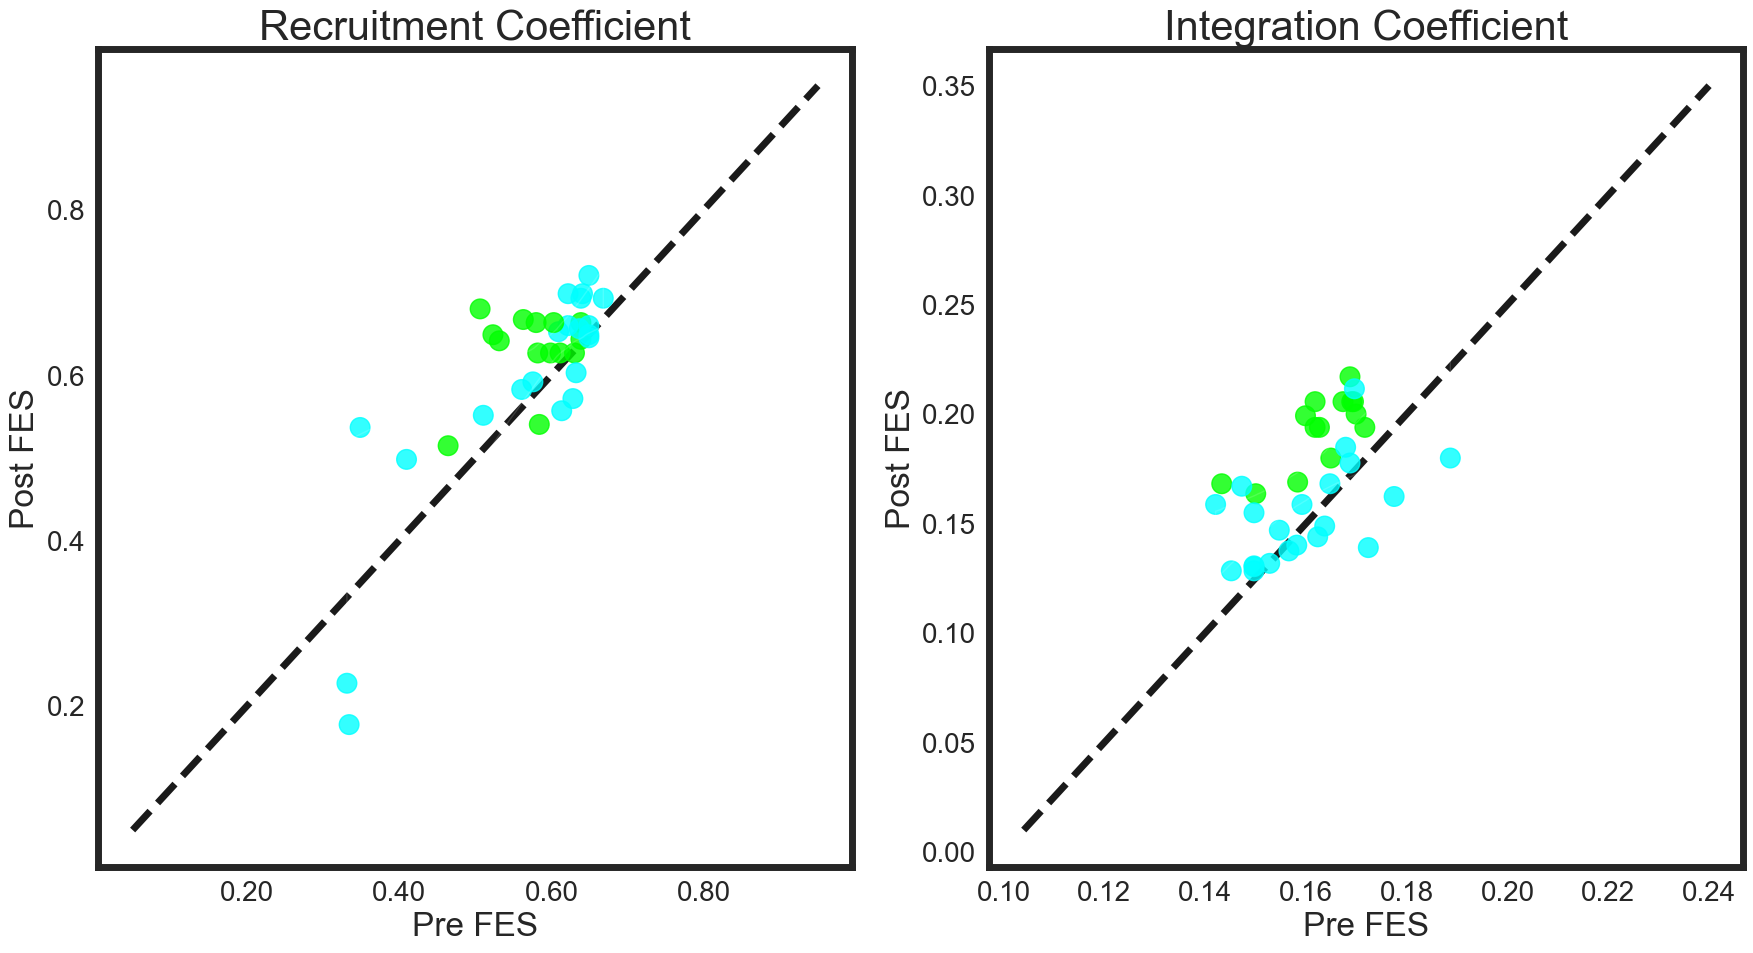

In [108]:
from matplotlib.ticker import FormatStrFormatter


label = [
    'VN',
    'SMN',
    'DAN',
    'VAN',
    'LN',
    'FPN',
    'DMN'
]

color_rgb = {
    "purple": (128/255, 0, 128/255),
    "blue": (0, 0, 255/255),
    "green": (0, 128/255, 0),
    "violet": (238/255, 130/255, 238/255),
    "moccasin": (255/255, 228/255, 181/255),
    "orange": (255/255, 165/255, 0),
    "red": (255/255, 0, 0),
    "lime": (0, 1, 0),
    "cyan": (0, 1, 1)
}

r_fn1 = ["DAN", "VN"]
r_fn1 = list(set(r_fn1))

r_fnc1 = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
r_fnc1 = [color_rgb[color] for color in r_fnc1]
 

# r_fnc3 = ['purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'violet', 'purple', 'purple']
# r_fnc3 = [color_rgb[color] for color in r_fnc3]

i_fn1 = ["DAN"]
i_fn1 = list(set(i_fn1))

i_fnc1 = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
i_fnc1 = [color_rgb[color] for color in i_fnc1]
 

# i_fnc3 = ['violet']
# i_fnc3 = [color_rgb[color] for color in i_fnc3]

scatter_kws_rec1 = {"color": r_fnc1, "s": 200}
# scatter_kws_rec2 = {"color": r_fnc2, "s": 200}
# scatter_kws_rec3 = {"color": r_fnc3, "s": 200}

scatter_kws_int1 = {"color": i_fnc1, "s": 200}
# scatter_kws_int2 = {"color": i_fnc2, "s": 200}
# scatter_kws_int3 = {"color": i_fnc3, "s": 200}

# fn_label = [label[l] for l in i_fn2]

# sig_rec = np.where((diff_rec >= 0.2) & (pvalue_rec == 0))[0] # -np.sort(-diff_rec)[10]
# fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))
# sns.set(style = 'white') # whitegrid
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
sns.set(style='white')

# Recruitment 1-3
sns.regplot(x=x_rec3, y=z_rec3, ci=95, scatter_kws=scatter_kws_rec1, line_kws={"color": "none"} ,ax=ax1) # line_kws={"color":"red", 'label':'Regression line'},
ax1.set_xlabel(group_label[0]+"", fontsize=24) 
ax1.set_ylabel(group_label[2]+"", fontsize=24)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax1.set_xticklabels(xlabels, size=20)
ax1.set_yticklabels(ylabels, size=20)
ax1.set_title('Recruitment Coefficient', fontsize=30)
lims = [0.05, 0.95]  # min/max of both axes
# lims = [np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
#         np.max([ax1.get_xlim(), ax1.get_ylim()])]  # max of both axes
ax1.plot(lims, lims, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth = '5')
# ax1.axis('square') # scaled, equal, square


# integration 1-3
# x_in = integration[0]
# y_in = integration[3]
sns.regplot(x=x_in3, y=z_in3, ci=95, scatter_kws=scatter_kws_int1, line_kws={"color": "none"}, ax=ax2)# 
# y_min, y_max = ax2.get_ylim()
# x_min, x_max = ax2.get_xlim()
ax2.set_xlabel(group_label[0]+"", fontsize=24) 
ax2.set_ylabel(group_label[2]+"", fontsize=24)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax2.set_xticklabels(xlabels, size=20)
ax2.set_yticklabels(ylabels, size=20)
ax2.set_title('Integration Coefficient', fontsize=30)
lims1 = [0.01, 0.35]  # min/max of both axes
ax2.plot(lims1, lims1, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth = '5')
# ax2.axis('square') # scaled, equal, square



ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

for location in ['left', 'right', 'top', 'bottom']:
    ax1.spines[location].set_linewidth(5)
for location in ['left', 'right', 'top', 'bottom']:
    ax2.spines[location].set_linewidth(5)
# for location in ['left', 'right', 'top', 'bottom']:
#     ax3.spines[location].set_linewidth(5)
# for location in ['left', 'right', 'top', 'bottom']:
#     ax4.spines[location].set_linewidth(5)
# for location in ['left', 'right', 'top', 'bottom']:
#     ax5.spines[location].set_linewidth(5)
# for location in ['left', 'right', 'top', 'bottom']:
#     ax6.spines[location].set_linewidth(5)

plt.grid(False)
plt.rcParams["axes.grid"] = False
plt.tight_layout(pad=2.0) # spacing between subplots groupDiffScatter
plt.show()

fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/DirectionalityPlotsmn_nfes'+analysis+'.png',
             format='png', dpi=300)


In [62]:
# lims # 0.05333723653395786, 0.9106656346749226  0.05, 0.95
# lims1 # 0.013759563211514522, 0.33690984999999996 0.01, 0.35

In [109]:
def perm_test_allegiance(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    diff = np.abs(alg_s2 - alg_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

pvalue = perm_test_allegiance(S_g1, S_g3, nmc=10)
print(f'Shape pvalue: {pvalue.shape} {allegiance[0].shape} {allegiance[2].shape}')
# allegiance[1] Pre=0 Mid=1 Post=2

permutation #:  0
Shape pvalue: (200, 200) (200, 200) (200, 200)


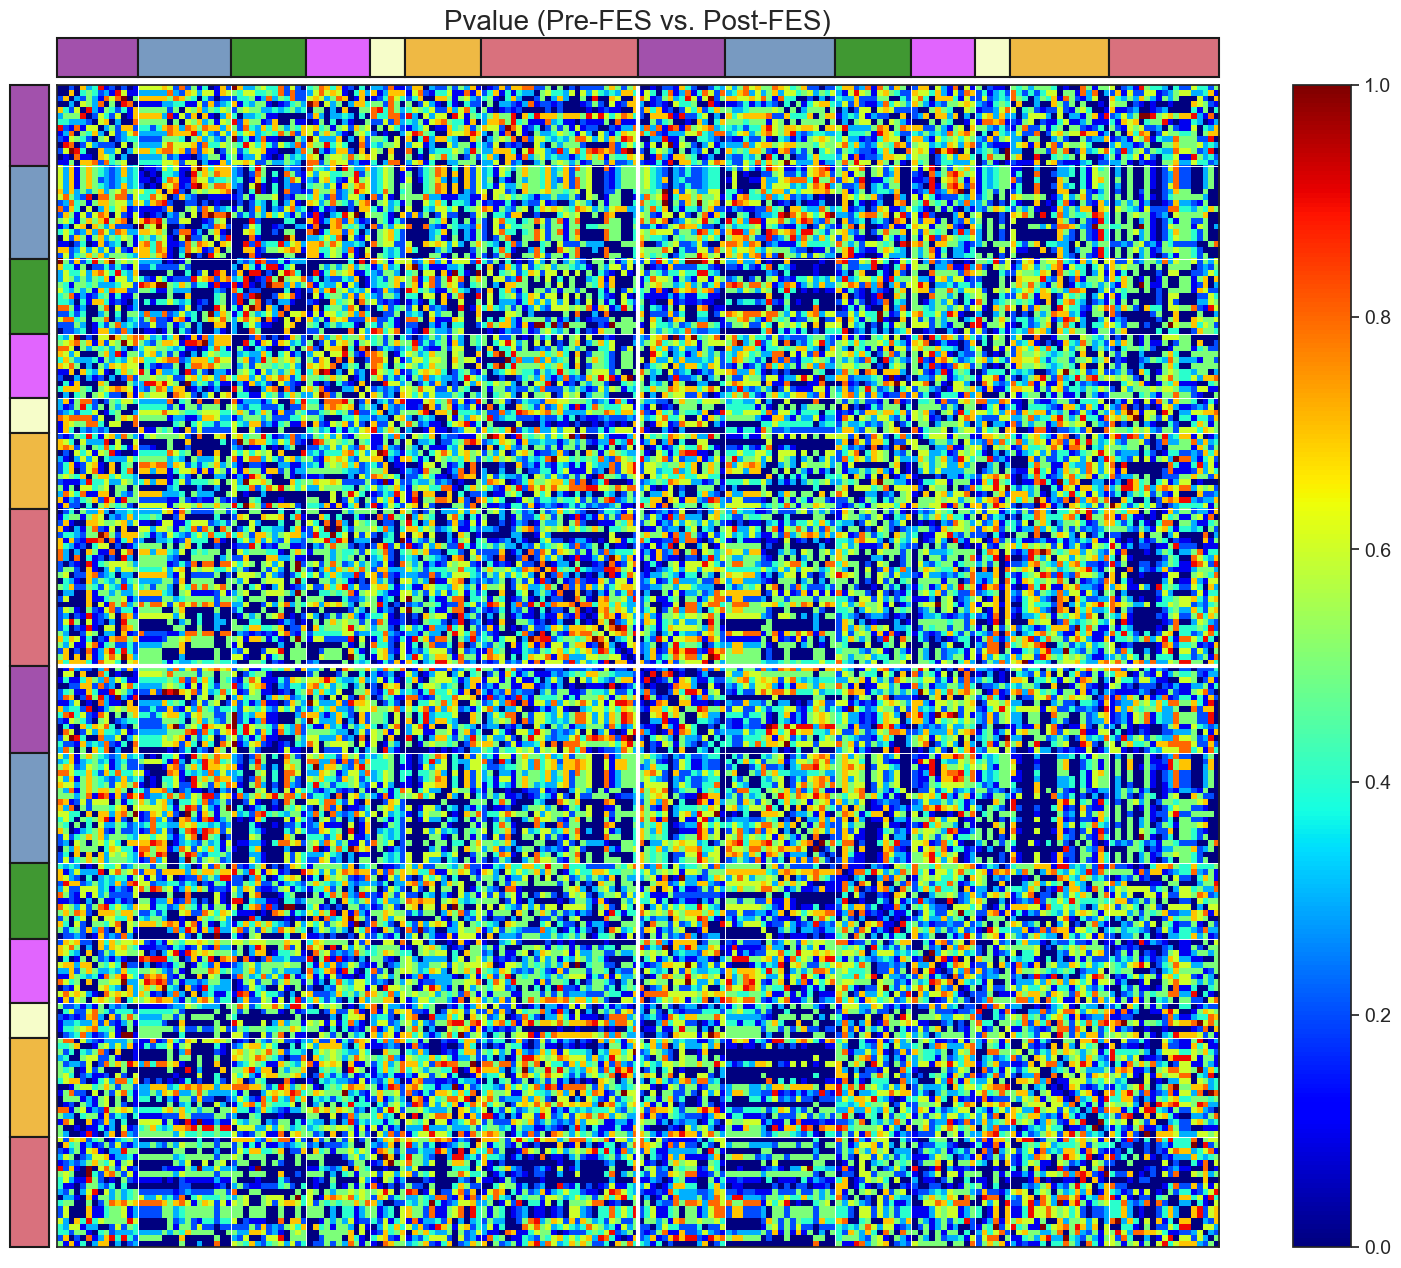

In [110]:
# Non Binary Pvalue 
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap

# PreFES vs PostFES
f = plt.figure(figsize=(19,15))
plt.matshow(pvalue, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title('Pvalue (Pre-FES vs. Post-FES)', fontsize=20, y=1.04)
# plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
# plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/pvalue_diff_prefes_postfes.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

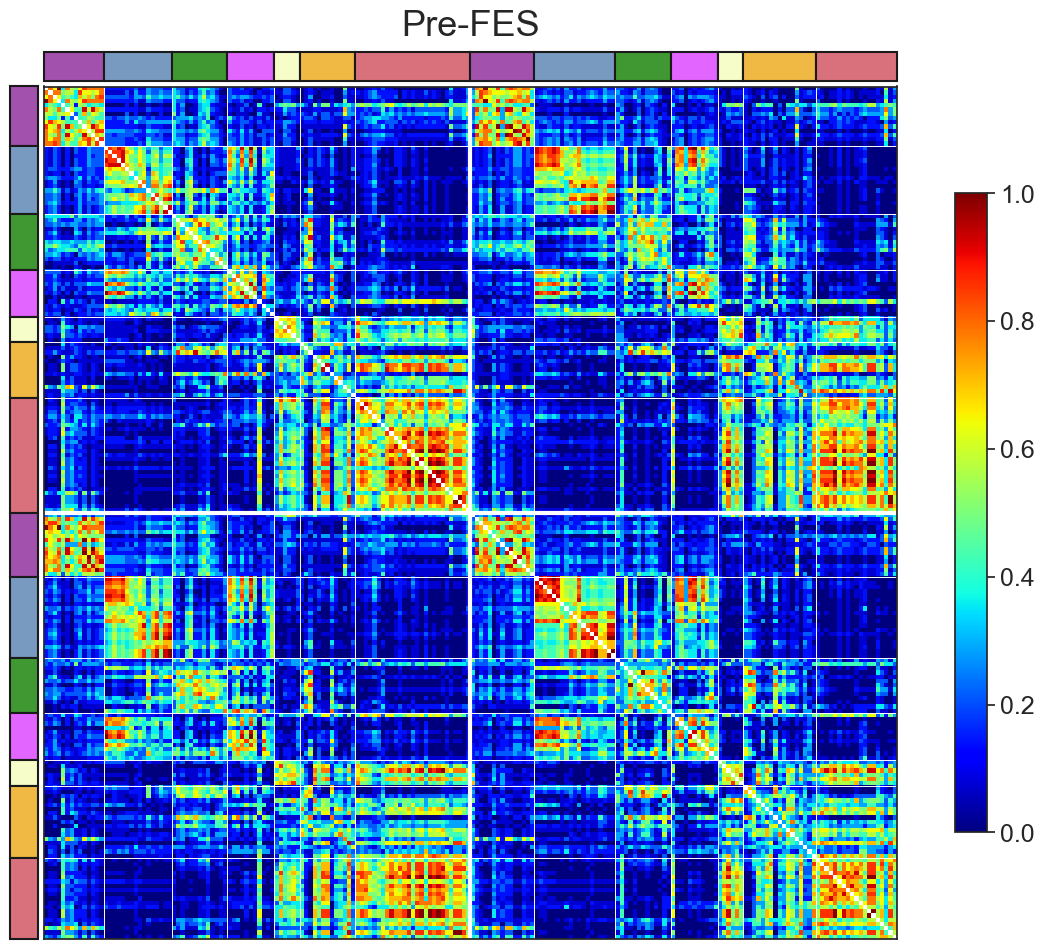

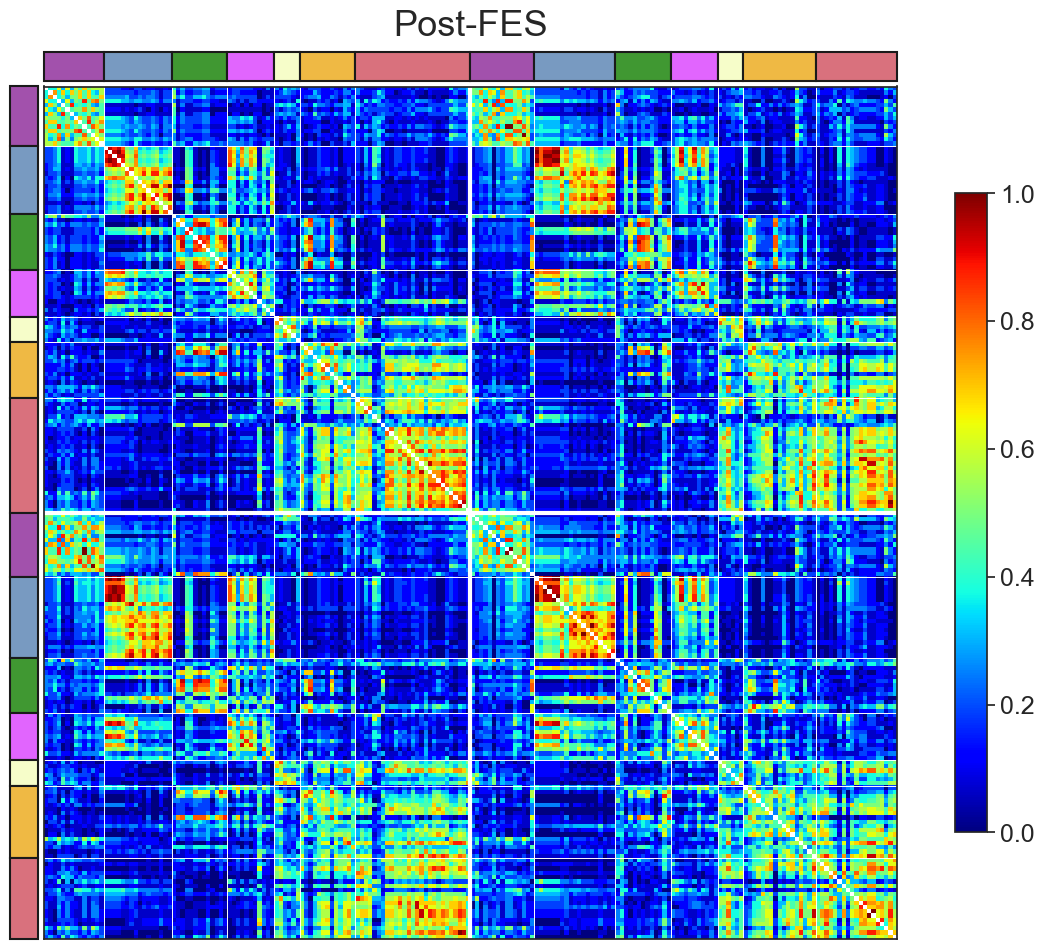

In [111]:
#%% Allegiance matrix plots
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Group 1 alg_s1, alg_s2 p_value_a, alg_s_prefes, alg_s_prenfes
f = plt.figure(figsize=(15,11))
plt.matshow(allegiance[0], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title("Pre-FES", fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb=plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white', linewidth=3)
plt.axhline(y=100-0.5,color='white', linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/allegiance_PreFES.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)



# Group 3   
f = plt.figure(figsize=(15,11))
plt.matshow(allegiance[2], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title("Post-FES", fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/allegiance_PostFES.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)

node_coords = np.array([(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)])



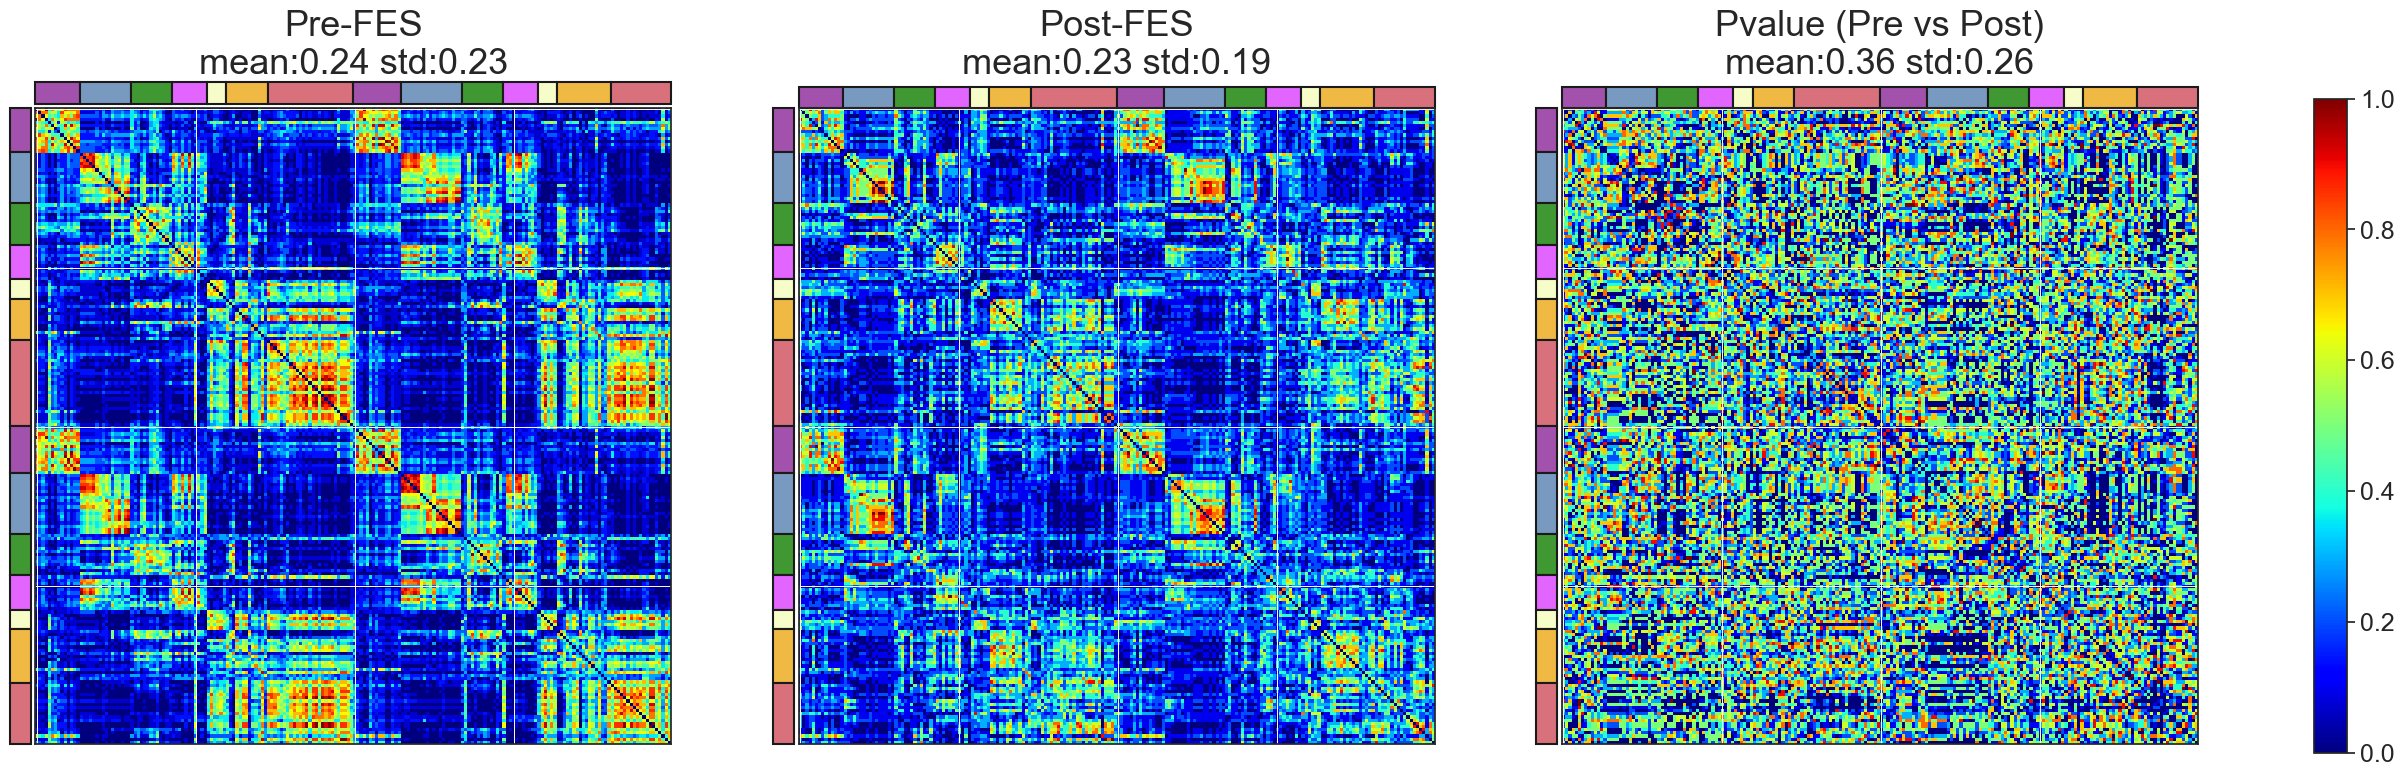

In [116]:
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
allegiance = [allegiance[0], allegiance[1], pvalue]
allegiance[0] = np.nan_to_num(allegiance[0], nan=0)
allegiance[1] = np.nan_to_num(allegiance[1], nan=0)
allegiance[2] = np.nan_to_num(allegiance[2], nan=0)
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix
# plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
im1 = axs[0].matshow(allegiance[0], vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'Pre-FES\nmean:{np.mean(allegiance[0]):.2f} std:{np.std(allegiance[0]):.2f}', fontsize=26, y=1.04)


# Plot the second matrix
im2 = axs[1].matshow(allegiance[1], vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'Post-FES\nmean:{np.mean(allegiance[1]):.2f} std:{np.std(allegiance[1]):.2f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(allegiance[2], vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue (Pre vs Post)\nmean:{np.mean(allegiance[2]):.2f} std:{np.std(allegiance[2]):.2f}', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [118]:
df1_pre = pd.DataFrame(corr_g1_mean)
df2_post = pd.DataFrame(corr_g5_mean)
# corr_g1_mean  corr_g5_mean
fc_file = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/fc_smn_matrices_full.xlsx"
with pd.ExcelWriter(fc_file, engine="xlsxwriter") as writer:
    df1_pre.to_excel(writer, sheet_name="fc_PreFES_all", index=False)
    df2_post.to_excel(writer, sheet_name="fc_PostFES_all", index=False)

print(f"SMN matrix file saved successfully.")

SMN matrix file saved successfully.


In [113]:
#PreFES
# Slice rows and columns from 15:31 and 116:135
alg_pre = allegiance[0]
alg_post = allegiance[1]
pvalue = allegiance[2]
s1 = alg_pre[15:31, 15:31]     # Shape (16, 16)
s2 = alg_pre[15:31, 116:135]   # Shape (16, 19)
s3 = alg_pre[116:135, 15:31]   # Shape (19, 16)
s4 = alg_pre[116:135, 116:135] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
alg_smn_matrix_prefes = np.vstack((top_half, bottom_half))  # Shape (35, 35)

s1 = alg_post[15:31, 15:31]     # Shape (16, 16)
s2 = alg_post[15:31, 116:135]   # Shape (16, 19)
s3 = alg_post[116:135, 15:31]   # Shape (19, 16)
s4 = alg_post[116:135, 116:135] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
alg_smn_matrix_postfes = np.vstack((top_half, bottom_half))  # Shape (35, 35)

s1 = pvalue[15:31, 15:31]     # Shape (16, 16)
s2 = pvalue[15:31, 116:135]   # Shape (16, 19)
s3 = pvalue[116:135, 15:31]   # Shape (19, 16)
s4 = pvalue[116:135, 116:135] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
pvalue_smn_matrix_prepostfes = np.vstack((top_half, bottom_half))  # Shape (35, 35)

print(f'Allegiance SMN PreFES:{alg_smn_matrix_prefes.shape} {alg_smn_matrix_postfes.shape} {pvalue_smn_matrix_prepostfes.shape}')

Allegiance SMN PreFES:(35, 35) (35, 35) (35, 35)


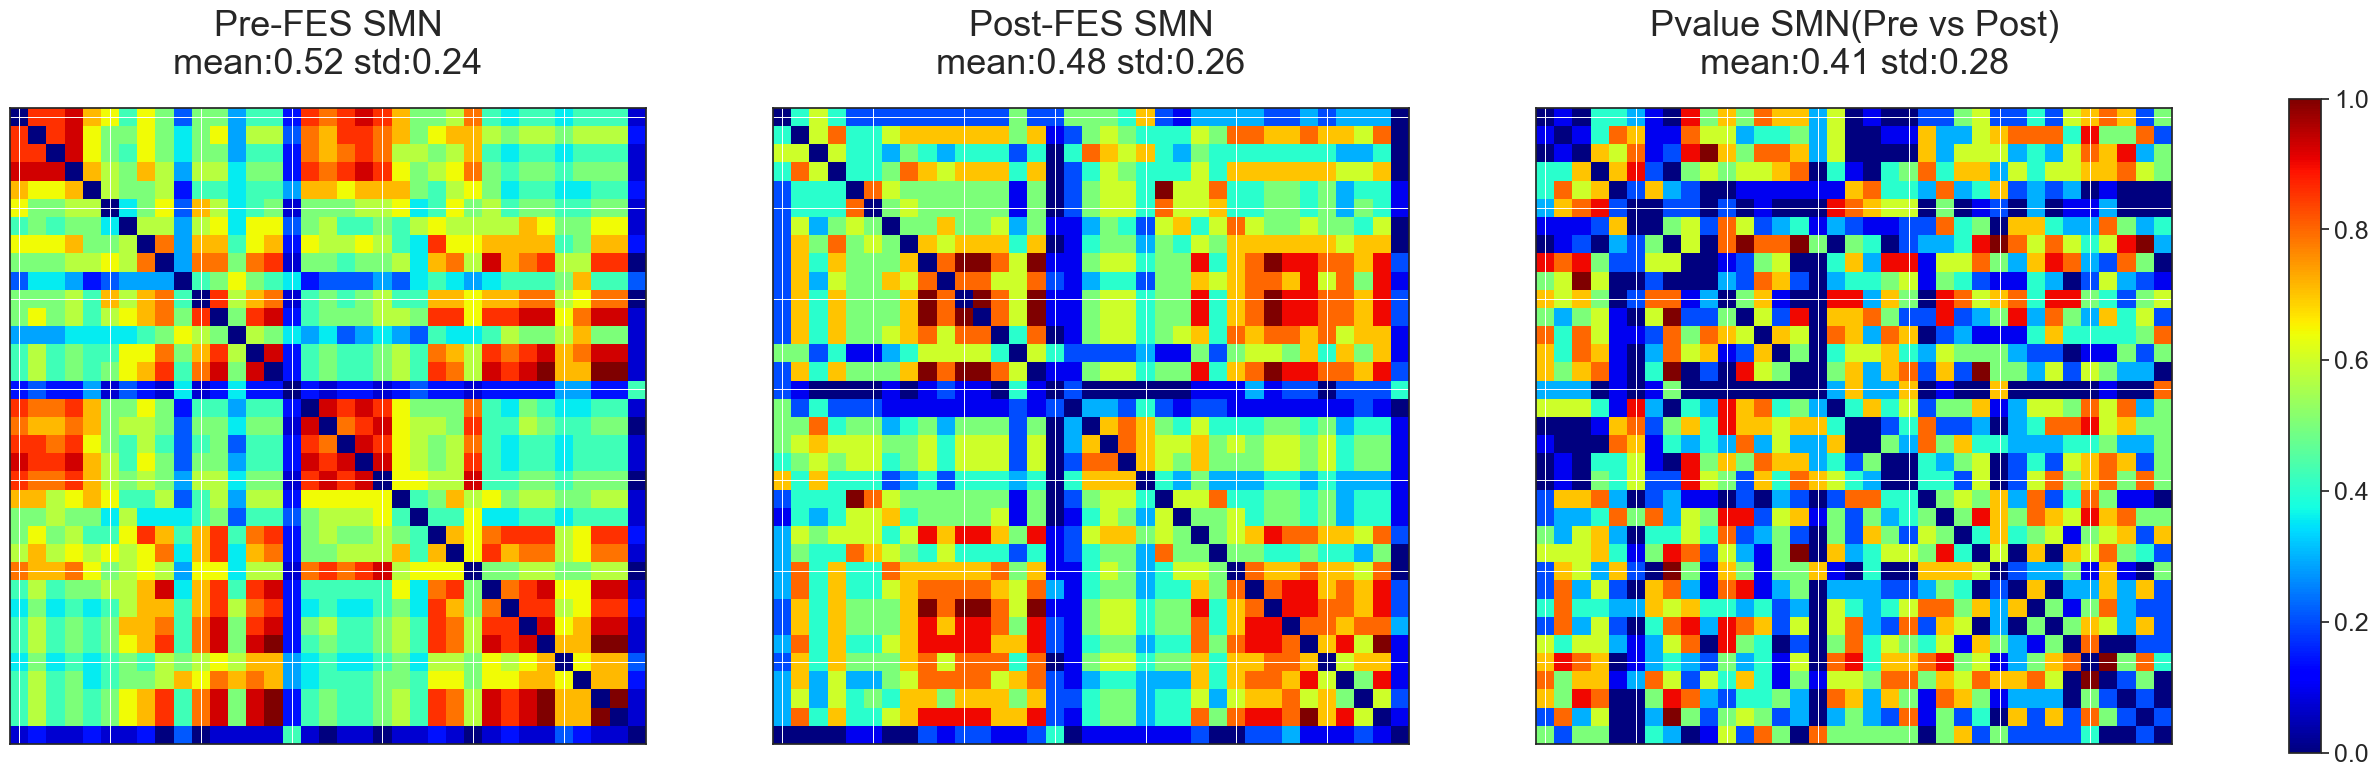

In [114]:
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# 
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix 
im1 = axs[0].matshow(alg_smn_matrix_prefes, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'Pre-FES SMN\nmean:{np.mean(alg_smn_matrix_prefes):.2f} std:{np.std(alg_smn_matrix_prefes):.2f}', fontsize=26, y=1.04)


# Plot the second matrix
im2 = axs[1].matshow(alg_smn_matrix_postfes, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'Post-FES SMN\nmean:{np.mean(alg_smn_matrix_postfes):.2f} std:{np.std(alg_smn_matrix_postfes):.2f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(pvalue_smn_matrix_prepostfes, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue SMN(Pre vs Post)\nmean:{np.mean(pvalue_smn_matrix_prepostfes):.2f} std:{np.std(pvalue_smn_matrix_prepostfes):.2f}', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

# axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# # Add rectangle objects as tick labels (Y axis)
# w = (ymax-ymin)/30; i = ymax # intercept
# axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
# axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [115]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 21:27:38.696749


In [23]:
# import pkg_resources

# installed_packages = pkg_resources.working_set
# for package in installed_packages:
#     print(f"{package.key}=={package.version}")

ipykernel==5.5.5
jupyter-console==6.4.4
notebook==6.5.6
babel==2.11.0
bottleneck==1.3.5
brotli==1.0.9
jinja2==3.1.2
markupsafe==2.1.1
pillow==10.1.0
pyqt5==5.15.10
pyqt5-sip==12.13.0
pyqtwebengine==5.15.6
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.15.1
qdarkstyle==3.0.2
qtawesome==1.2.2
qtpy==2.4.1
rtree==1.0.1
sqlalchemy==2.0.23
send2trash==1.8.2
sphinx==5.0.2
unidecode==1.2.0
alabaster==0.7.12
anyio==3.5.0
applaunchservices==0.3.0
appnope==0.1.2
apptools==5.2.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astor==0.8.1
astroid==2.14.2
asttokens==2.0.5
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
backcall==0.2.0
bctpy==0.6.1
beautifulsoup4==4.12.2
bids-validator==1.13.1
binaryornot==0.4.4
black==0.0
bleach==4.1.0
brainconn==0.0.1
certifi==2023.11.17
cffi==1.16.0
cftime==1.6.3
chardet==4.0.0
charset-normalizer==2.0.4
citeproc-py==0.6.0
click==8.1.7
cloudpickle==2.2.1
colorama==0.4.6
comm==0.1.2
configobj==5.0.8
contourpy==1.2.0
cookiecutter==1.7.3
cryptography==41.0.

<ipython-input-23-80b1638e1925>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
